In [1]:
%load_ext autoreload
%autoreload 2

## Git repository has already been created on "https://github.com/SimonUTS24661225/ADV_MLA_AT1". This is a new version of first experiment notebook with new data preparation for the logistic regression model. Thus, it can be a bit different to Experiment 1 that was submitted in week1.

## 1. Data Preparation

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
import joblib

import warnings
warnings.filterwarnings("ignore")

In [67]:
training_data = pd.read_csv('../data/train.csv')
testing_data = pd.read_csv('../data/test.csv')

training_data.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


In [69]:
testing_data.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,Morgan St.,MEAC,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,...,-2.467740,-2.275660,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000,cf302b4d-84f7-4124-a25d-a75eed31978b
1,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,...,-7.494720,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,f91837cd-4f49-4b70-963d-aeb82c6ce3da
2,Binghamton,AE,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,...,-2.924950,1.717890,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889,53ec2a29-1e7d-4c6d-86d7-d60d02af8916
3,Illinois,B10,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,...,-0.767911,0.962469,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143,32402798-471c-4a54-8cb4-29cd95199014
4,Iowa St.,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,...,2.893610,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,73b960f9-27b8-4431-9d23-a760e9bbc360


In [6]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

In [7]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 4970 non-null   object 
 1   conf                 4970 non-null   object 
 2   GP                   4970 non-null   int64  
 3   Min_per              4970 non-null   float64
 4   Ortg                 4970 non-null   float64
 5   usg                  4970 non-null   float64
 6   eFG                  4970 non-null   float64
 7   TS_per               4970 non-null   float64
 8   ORB_per              4970 non-null   float64
 9   DRB_per              4970 non-null   float64
 10  AST_per              4970 non-null   float64
 11  TO_per               4970 non-null   float64
 12  FTM                  4970 non-null   int64  
 13  FTA                  4970 non-null   int64  
 14  FT_per               4970 non-null   float64
 15  twoPM                4970 non-null   i

In [8]:
testing_data['yr'].unique()

array(['Sr', 'Jr', 'So', 'Fr', nan], dtype=object)

In [9]:
training_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
GP,56091.000000,23.411973,10.090542,1.000000,16.000000,28.000000,31.000000,41.000000
Min_per,56091.000000,37.325229,28.061897,0.000000,9.500000,35.900000,62.200000,98.000000
Ortg,56091.000000,91.858295,30.538819,0.000000,84.100000,97.100000,106.900000,834.000000
usg,56091.000000,18.149265,6.204489,0.000000,14.500000,18.100000,21.800000,50.000000
eFG,56091.000000,44.575513,18.213813,0.000000,40.100000,47.700000,53.200000,150.000000
TS_per,56091.000000,47.676882,17.414133,0.000000,43.930000,50.850000,56.060000,150.000000
ORB_per,56091.000000,5.575376,9.480239,0.000000,1.800000,4.300000,8.100000,1576.600000
DRB_per,56091.000000,12.673716,10.878099,0.000000,8.400000,11.900000,16.000000,1385.000000
AST_per,56091.000000,10.848740,9.356001,0.000000,4.600000,9.100000,15.100000,100.000000
TO_per,56091.000000,20.337819,12.226129,0.000000,14.800000,19.100000,24.500000,100.000000


In [10]:
testing_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
GP,4970.000000,15.865795,8.276655,1.000000,9.000000,17.000000,22.000000,33.000000
Min_per,4970.000000,34.906881,27.921356,0.100000,6.700000,32.350000,59.900000,96.000000
Ortg,4970.000000,89.500644,35.338827,0.000000,80.900000,96.800000,107.100000,391.200000
usg,4970.000000,17.867626,6.780159,0.000000,14.200000,18.000000,21.800000,48.200000
eFG,4970.000000,43.657203,20.716630,0.000000,38.400000,48.100000,54.000000,150.000000
TS_per,4970.000000,46.538342,19.992005,0.000000,42.340000,50.850000,56.780000,150.000000
ORB_per,4970.000000,5.168390,7.030561,0.000000,1.400000,3.700000,7.400000,231.800000
DRB_per,4970.000000,13.048753,9.248595,0.000000,8.400000,12.300000,16.800000,121.100000
AST_per,4970.000000,10.356801,9.427192,0.000000,4.300000,8.600000,14.500000,100.000000
TO_per,4970.000000,18.962254,13.255566,0.000000,13.100000,18.100000,23.400000,100.000000


In [11]:
print('Number of rows in Training Data: "'+str(training_data.shape[0]) + '" and number of columns: "'+str(training_data.shape[1]) + '"')
print('Number of rows in Testing  Data: "'+str(testing_data.shape[0]) + '"  and number of columns: "'+str(testing_data.shape[1]) + '"')

Number of rows in Training Data: "56091" and number of columns: "64"
Number of rows in Testing  Data: "4970"  and number of columns: "63"


Drafted column, which is a target variable, is included in training dataset but not in testing dataset.

## 2. Data Cleaning and EDA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


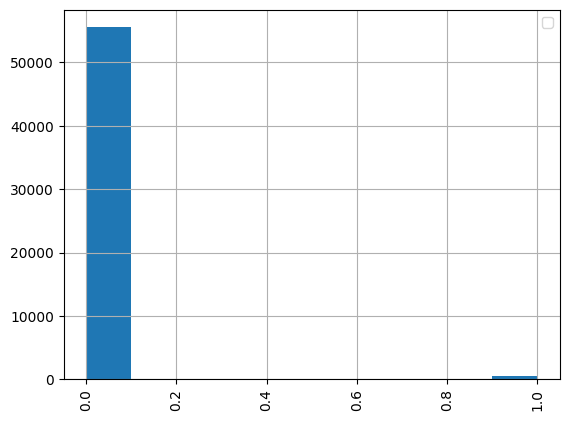

In [70]:
training_data['drafted'].hist()
plt.xticks(label= 'drafted', rotation = 90)
plt.legend()
plt.show()

In [13]:
missing_cols_training = []

for i in training_data.columns:
    if training_data[i].isnull().sum() > 0:
        missing_cols_training.append(i)
        
missing_cols_training

['yr',
 'ht',
 'num',
 'Rec_Rank',
 'ast_tov',
 'rimmade',
 'rimmade_rimmiss',
 'midmade',
 'midmade_midmiss',
 'rim_ratio',
 'mid_ratio',
 'dunksmade',
 'dunksmiss_dunksmade',
 'dunks_ratio',
 'pick',
 'drtg',
 'adrtg',
 'dporpag',
 'stops',
 'bpm',
 'obpm',
 'dbpm',
 'gbpm',
 'mp',
 'ogbpm',
 'dgbpm',
 'oreb',
 'dreb',
 'treb',
 'ast',
 'stl',
 'blk',
 'pts']

In [14]:
percent_missing_cols_training  = []

for i in training_data.columns:
    if training_data[i].isnull().sum() > 0:
        percent_missing_cols_training.append(round((training_data[i].isnull().sum() / len(training_data)*100), 3))

percent_missing_cols_training

[0.521,
 0.175,
 8.361,
 69.628,
 7.47,
 10.841,
 10.841,
 10.841,
 10.841,
 16.873,
 17.272,
 10.841,
 10.841,
 54.898,
 97.529,
 0.078,
 0.078,
 0.078,
 0.078,
 0.078,
 0.078,
 0.078,
 0.078,
 0.068,
 0.078,
 0.078,
 0.068,
 0.068,
 0.068,
 0.068,
 0.068,
 0.068,
 0.068]

<Axes: >

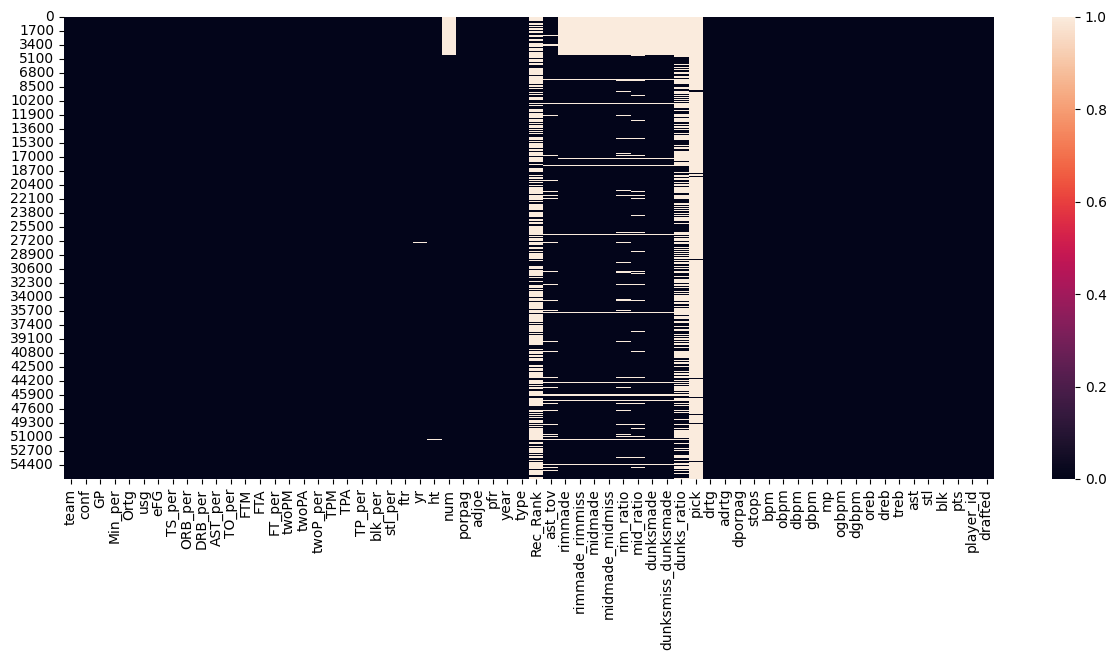

In [15]:
plt.figure(figsize=(15, 6))
sns.heatmap(training_data.isnull())

In training dataset, there are 70% of missing values in 'Rec_Rank' column, 55% in 'dunks_ratio' column and 97.5% in 'pick' column. First, the entire 'pick', 'Rec_Rank' and 'dunks_ratio'  column will be removed due to very high proportion of missingvalues. Additionally, there are also small proportions of missing values in 
'ast_tov',
'rimmade',
'rimmade_rimmiss',
'midmade',
'midmade_midmiss',
'rim_ratio',
'mid_ratio',
'dunksmade',
'dunksmiss_dunksmade'. While missing values in columns with more than 50% missing values would be removed, the rest of missing values would be filled with average of columns.  

In [71]:
missing_cols_testing  = []

for i in testing_data.columns:
    if testing_data[i].isnull().sum() > 0:
        missing_cols_testing.append(i)
        
missing_cols_testing

['yr',
 'ht',
 'num',
 'Rec_Rank',
 'ast_tov',
 'rimmade',
 'rimmade_rimmiss',
 'midmade',
 'midmade_midmiss',
 'rim_ratio',
 'mid_ratio',
 'dunksmade',
 'dunksmiss_dunksmade',
 'dunks_ratio',
 'pick',
 'drtg',
 'adrtg',
 'dporpag',
 'stops',
 'bpm',
 'obpm',
 'dbpm',
 'gbpm',
 'ogbpm',
 'dgbpm']

In [16]:
percent_missing_cols_testing  = []

for i in testing_data.columns:
    if testing_data[i].isnull().sum() > 0:
        percent_missing_cols_testing.append(round((testing_data[i].isnull().sum() / len(testing_data)*100), 3))
        
percent_missing_cols_testing

[0.04,
 0.262,
 1.932,
 71.147,
 10.805,
 4.99,
 4.99,
 4.99,
 4.99,
 12.998,
 14.024,
 4.99,
 4.99,
 54.668,
 99.014,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02]

<Axes: >

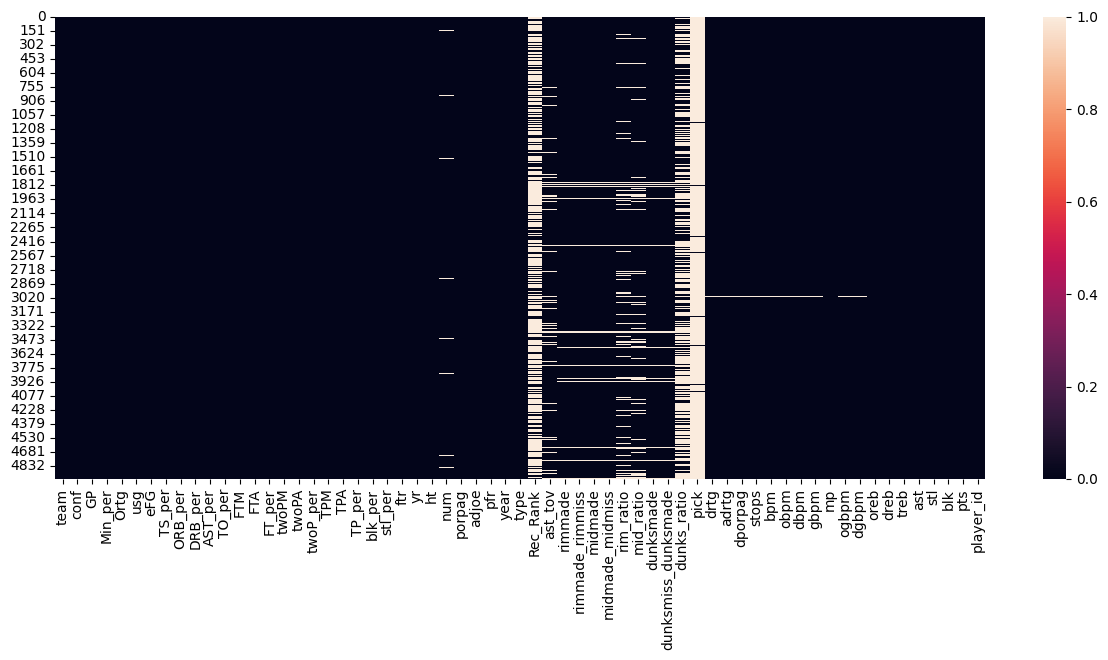

In [18]:
plt.figure(figsize=(15, 6))
sns.heatmap(testing_data.isnull())

Same in testing dataset. 'Pick', 'Rec_Rank', 'dunks_ratio' column will be removed  and others will be filled with average of values in columns.

In [72]:
training_data = training_data.drop('pick', axis=1)
training_data = training_data.drop('Rec_Rank', axis=1)
training_data = training_data.drop('dunks_ratio', axis=1)
testing_data = testing_data.drop('pick', axis=1)
testing_data = testing_data.drop('Rec_Rank', axis=1)
testing_data = testing_data.drop('dunks_ratio', axis=1)

In [73]:
columns_to_fill = [
    'ast_tov', 'rimmade', 'rimmade_rimmiss',
    'midmade', 'midmade_midmiss', 'rim_ratio',
    'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade','drtg','adrtg', 'dporpag', 'stops', 'bpm','obpm', 'dbpm','gbpm','ogbpm','dgbpm'
]

for column in columns_to_fill:
    training_data[column].fillna(training_data[column].mean(), inplace=True)
    testing_data[column].fillna(testing_data[column].mean(), inplace=True)


In [74]:
training_data.dropna(inplace=True)
#testing_data.dropna(inplace=True)

In [22]:
assert training_data.columns.isna().sum() == 0
assert testing_data.columns.isna().sum() == 0

In [23]:
print(training_data.duplicated().sum())
print(testing_data.duplicated().sum())

0
0


In [75]:
training_data['ht'].unique()

array(['6-Jun', '3-Jun', '2-Jun', '5-Jun', 'Jun-00', '4-Jun', '11-Jun',
       '7-Jun', '10-May', '10-Jun', '8-Jun', '9-Jun', '1-Jun', '11-May',
       'Jul-00', '9-May', '5-Jul', '8-May', 'Apr-00', '7-May', '1-Jul',
       '2-Jul', '6-May', '5-May', '3-Jul', '-', '4-Jul', '4-May', '0',
       '1-May', '3-May', '6-Jul', '5-Apr', '2-May'], dtype=object)

In [25]:
training_data['num'].unique()

array(['53', '5', '14', '22', '20', '34', '24', '54', '15', '13', '10',
       '21', '32', '12', '51', '31', '33', '1', '45', '50', '3', '23',
       '2', '4', '55', '35', '42', '25', '41', '52', '11', '40', '30',
       '43', '0', '44', '23B', 2.0, 15.0, 11.0, 0.0, 5.0, 34.0, 24.0,
       22.0, 1.0, 32.0, 23.0, 14.0, 20.0, 4.0, 33.0, 25.0, 40.0, 43.0,
       3.0, 12.0, 10.0, 30.0, 21.0, 31.0, 13.0, 50.0, 44.0, 41.0, 35.0,
       42.0, 45.0, 55.0, 54.0, 53.0, 52.0, 51.0, 26.0, '99', '4A',
       '31/24', '--', 99.0], dtype=object)

In [26]:
testing_data['yr'].unique()

array(['Sr', 'Jr', 'So', 'Fr', nan], dtype=object)

In [76]:
testing_data['num'].replace({'None': 0}, inplace=True)
training_data['num'].replace({'None': 0}, inplace=True)
training_data['num'].replace({'23B': '23'}, inplace=True)
training_data['num'].replace({'4A': '4'}, inplace=True)
training_data['num'].replace({'31/24': '31'}, inplace=True)
training_data['num'].replace({'--': '0'}, inplace=True)


In [77]:
testing_data['yr'].replace({'Fr': 1}, inplace=True)
testing_data['yr'].replace({'So': 2}, inplace=True)
testing_data['yr'].replace({'Jr': 3}, inplace=True)
testing_data['yr'].replace({'Sr': 4}, inplace=True)
testing_data['yr'].replace({'None': 0}, inplace=True)
training_data['yr'].replace({'Fr': 1}, inplace=True)
training_data['yr'].replace({'So': 2}, inplace=True)
training_data['yr'].replace({'Jr': 3}, inplace=True)
training_data['yr'].replace({'Sr': 4}, inplace=True)
training_data['yr'].replace({'None': 0}, inplace=True)

In [78]:
testing_data['yr'].fillna(0, inplace=True)
testing_data['yr'].unique()

array([4., 3., 2., 1., 0.])

In [79]:
testing_data['num'] = testing_data['num'].astype(float)
training_data['num'] = training_data['num'].astype(float)

In [80]:
testing_data['yr']= testing_data['yr'].astype(int)
training_data['yr']= training_data['yr'].astype(int)

Datasets will be split into categorical and numeric datasets.

In [81]:
# Spliting into numeric and categorical columns
num_cols_training = training_data.select_dtypes(exclude='object')
cat_cols_training = training_data.select_dtypes(include='object')

num_cols_training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51124 entries, 2336 to 56090
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GP                   51124 non-null  int64  
 1   Min_per              51124 non-null  float64
 2   Ortg                 51124 non-null  float64
 3   usg                  51124 non-null  float64
 4   eFG                  51124 non-null  float64
 5   TS_per               51124 non-null  float64
 6   ORB_per              51124 non-null  float64
 7   DRB_per              51124 non-null  float64
 8   AST_per              51124 non-null  float64
 9   TO_per               51124 non-null  float64
 10  FTM                  51124 non-null  int64  
 11  FTA                  51124 non-null  int64  
 12  FT_per               51124 non-null  float64
 13  twoPM                51124 non-null  int64  
 14  twoPA                51124 non-null  int64  
 15  twoP_per             51124 non-null  f

In [33]:
# Spliting into numeric and categorical columns
num_cols_testing = testing_data.select_dtypes(exclude='object')
cat_cols_testing = testing_data.select_dtypes(include='object')
num_cols_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GP                   4970 non-null   int64  
 1   Min_per              4970 non-null   float64
 2   Ortg                 4970 non-null   float64
 3   usg                  4970 non-null   float64
 4   eFG                  4970 non-null   float64
 5   TS_per               4970 non-null   float64
 6   ORB_per              4970 non-null   float64
 7   DRB_per              4970 non-null   float64
 8   AST_per              4970 non-null   float64
 9   TO_per               4970 non-null   float64
 10  FTM                  4970 non-null   int64  
 11  FTA                  4970 non-null   int64  
 12  FT_per               4970 non-null   float64
 13  twoPM                4970 non-null   int64  
 14  twoPA                4970 non-null   int64  
 15  twoP_per             4970 non-null   f

In [34]:
cat_cols_testing.to_csv('../data/cat_cols_testing.csv', index=False)

Categorical column ('player_id') will be used in further experiment to make a csv and submit the result on Kaggle.

In [35]:
num_cols_training.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
GP,51124.000000,23.545536,10.007369,1.000000,17.000000,28.000000,31.000000,41.000000
Min_per,51124.000000,37.557257,28.014047,0.000000,9.900000,36.300000,62.400000,96.700000
Ortg,51124.000000,92.306117,30.067360,0.000000,84.600000,97.400000,107.100000,834.000000
usg,51124.000000,18.164627,6.152037,0.000000,14.575000,18.100000,21.800000,50.000000
eFG,51124.000000,44.803499,18.002229,0.000000,40.400000,47.800000,53.300000,150.000000
TS_per,51124.000000,47.906806,17.189716,0.000000,44.160000,50.930000,56.130000,150.000000
ORB_per,51124.000000,5.536016,9.541731,0.000000,1.800000,4.300000,8.100000,1576.600000
DRB_per,51124.000000,12.735701,10.988630,0.000000,8.500000,11.900000,16.100000,1385.000000
AST_per,51124.000000,10.840284,9.272153,0.000000,4.700000,9.100000,15.100000,100.000000
TO_per,51124.000000,20.193981,12.021619,0.000000,14.700000,19.000000,24.300000,100.000000


In [36]:
testing_data.isnull().any()

team                   False
conf                   False
GP                     False
Min_per                False
Ortg                   False
usg                    False
eFG                    False
TS_per                 False
ORB_per                False
DRB_per                False
AST_per                False
TO_per                 False
FTM                    False
FTA                    False
FT_per                 False
twoPM                  False
twoPA                  False
twoP_per               False
TPM                    False
TPA                    False
TP_per                 False
blk_per                False
stl_per                False
ftr                    False
yr                     False
ht                      True
num                     True
porpag                 False
adjoe                  False
pfr                    False
year                   False
type                   False
ast_tov                False
rimmade                False
rimmade_rimmis

In [37]:
num_cols_testing.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
GP,4970.000000,15.865795,8.276655,1.000000,9.000000,17.000000,22.000000,33.000000
Min_per,4970.000000,34.906881,27.921356,0.100000,6.700000,32.350000,59.900000,96.000000
Ortg,4970.000000,89.500644,35.338827,0.000000,80.900000,96.800000,107.100000,391.200000
usg,4970.000000,17.867626,6.780159,0.000000,14.200000,18.000000,21.800000,48.200000
eFG,4970.000000,43.657203,20.716630,0.000000,38.400000,48.100000,54.000000,150.000000
TS_per,4970.000000,46.538342,19.992005,0.000000,42.340000,50.850000,56.780000,150.000000
ORB_per,4970.000000,5.168390,7.030561,0.000000,1.400000,3.700000,7.400000,231.800000
DRB_per,4970.000000,13.048753,9.248595,0.000000,8.400000,12.300000,16.800000,121.100000
AST_per,4970.000000,10.356801,9.427192,0.000000,4.300000,8.600000,14.500000,100.000000
TO_per,4970.000000,18.962254,13.255566,0.000000,13.100000,18.100000,23.400000,100.000000


In [38]:
num_cols_testing['num'].fillna(num_cols_testing['num'].mean(), inplace=True)

Missing values in 'num' column was filled with mean of values. 

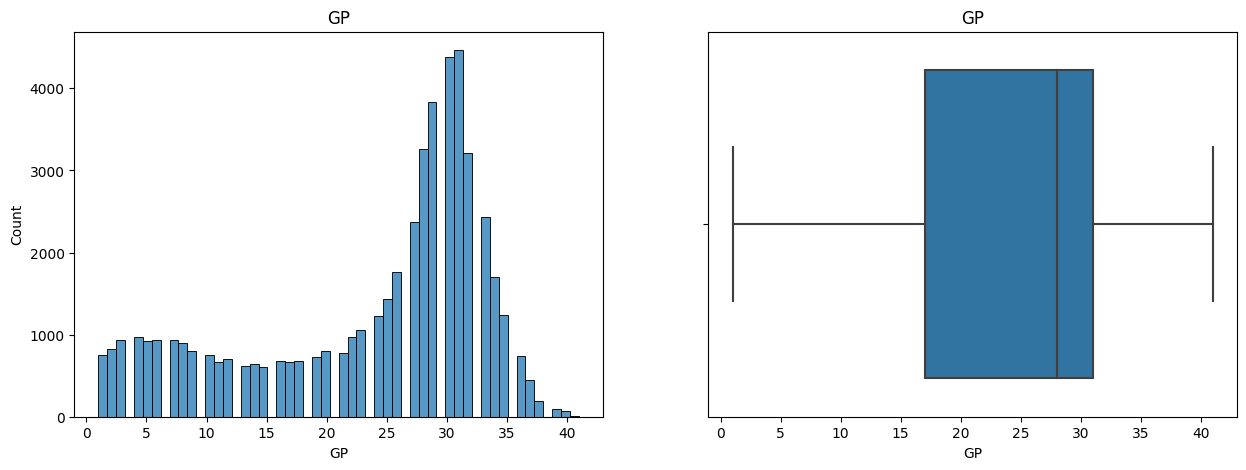

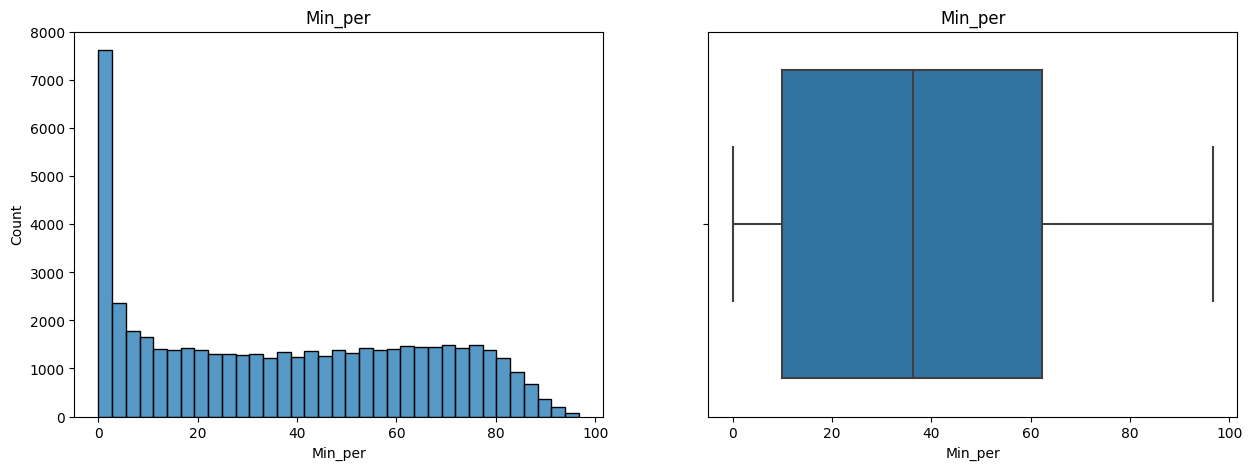

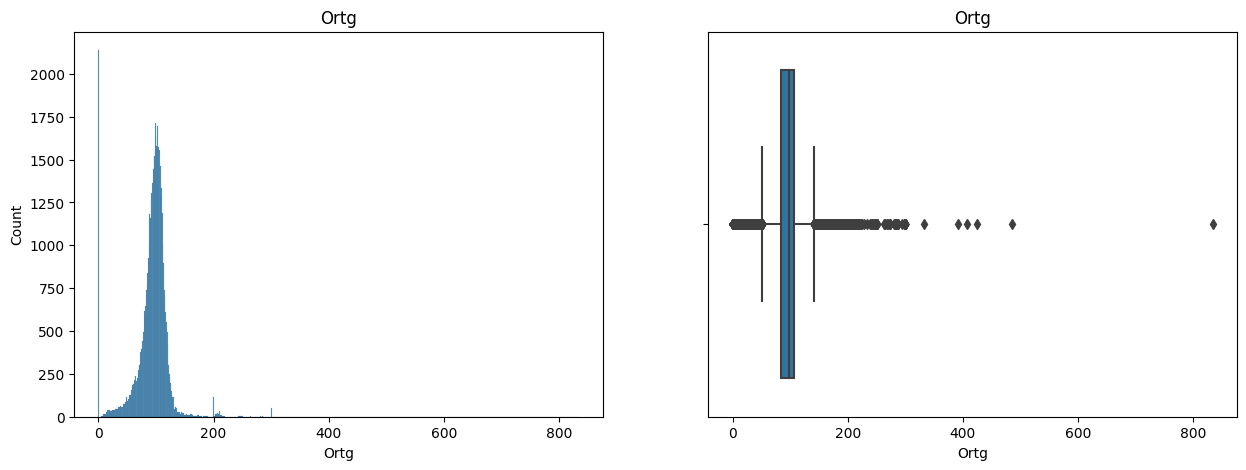

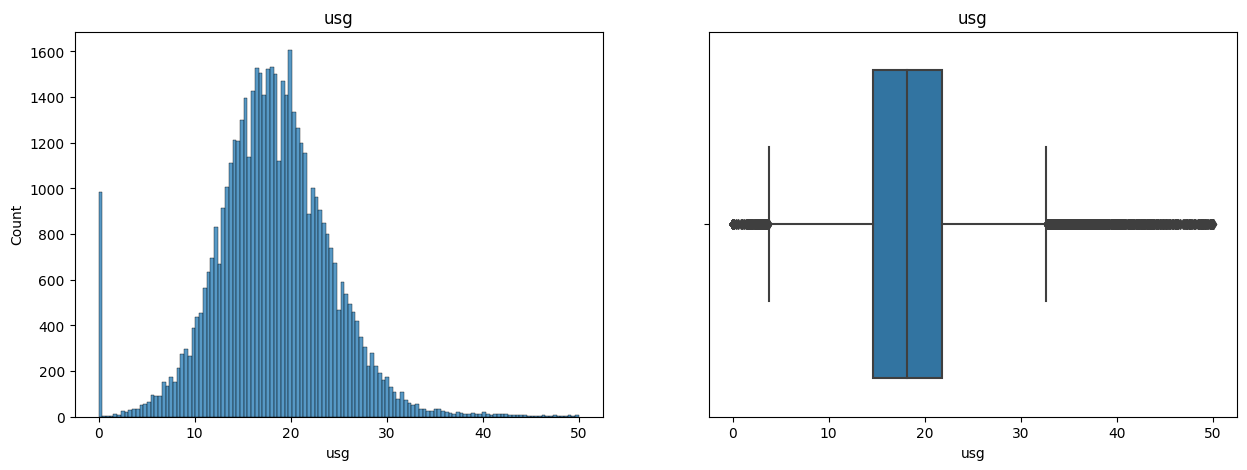

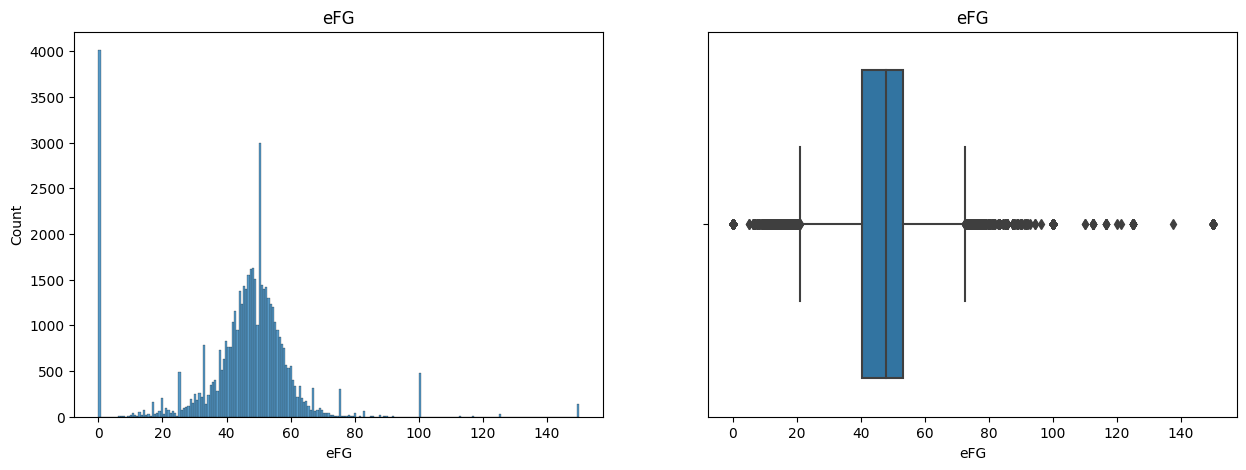

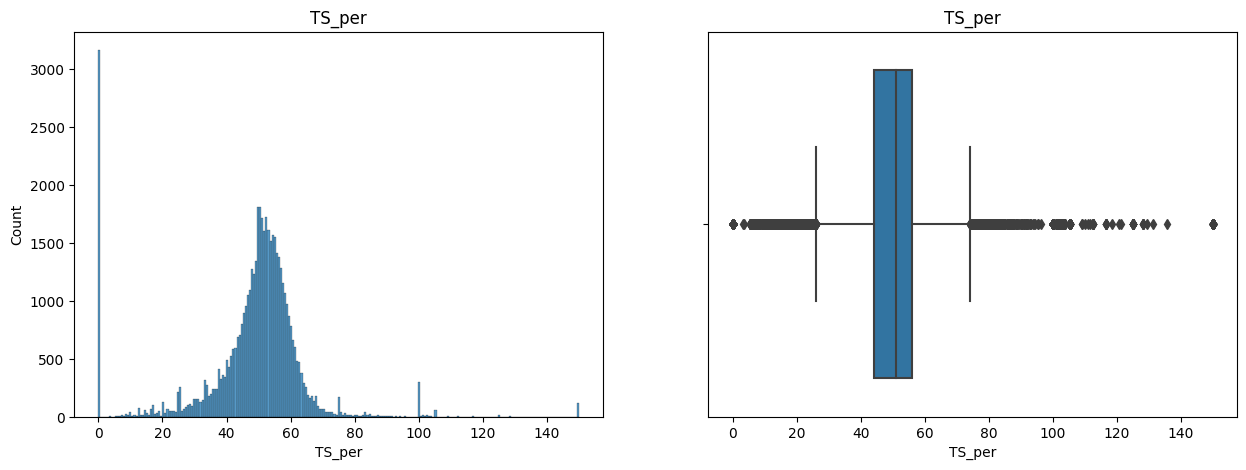

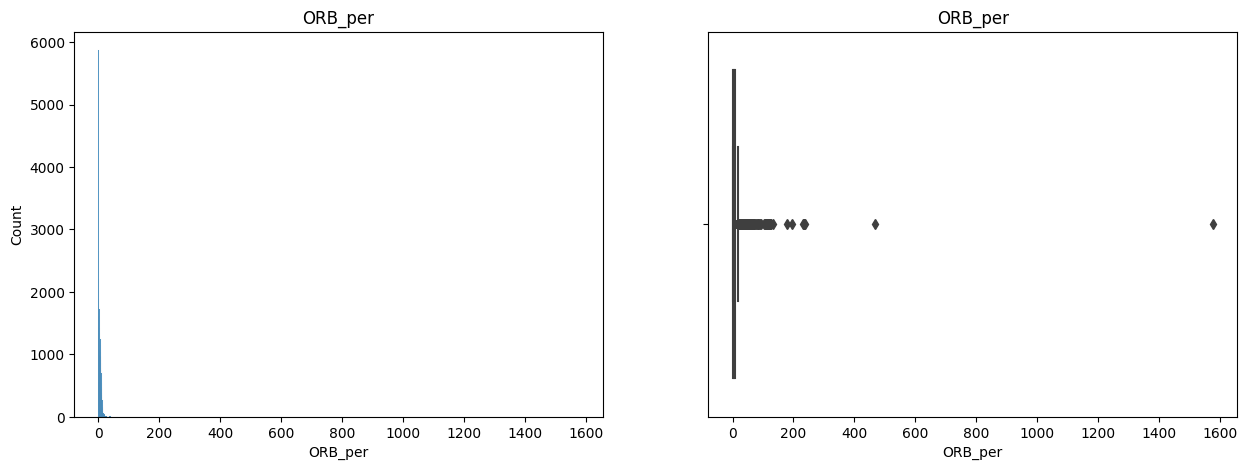

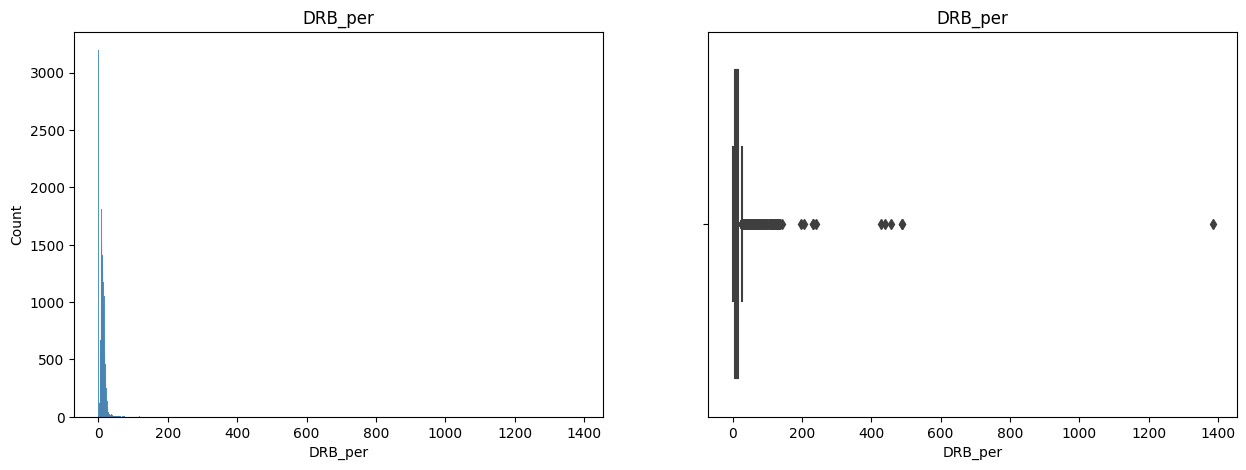

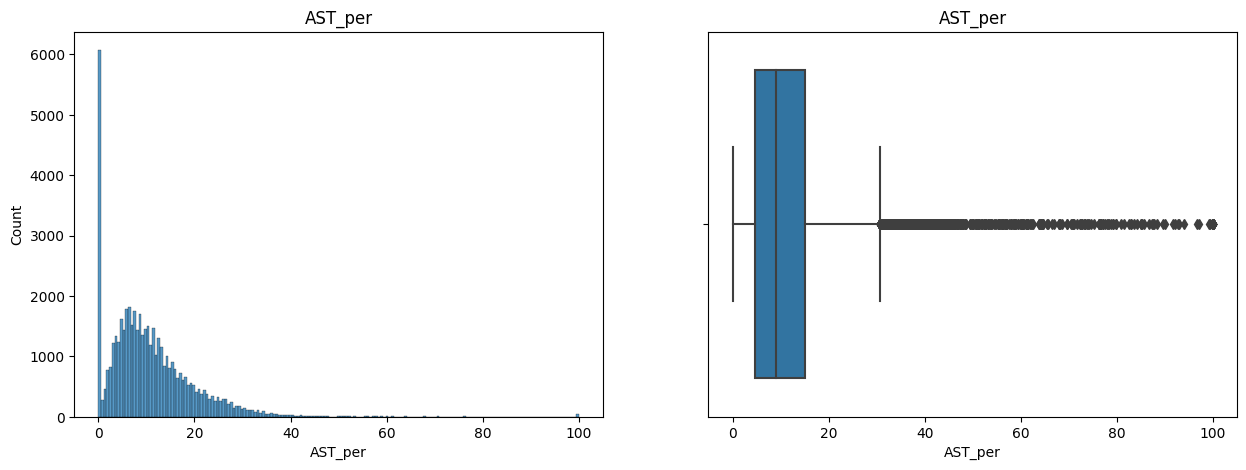

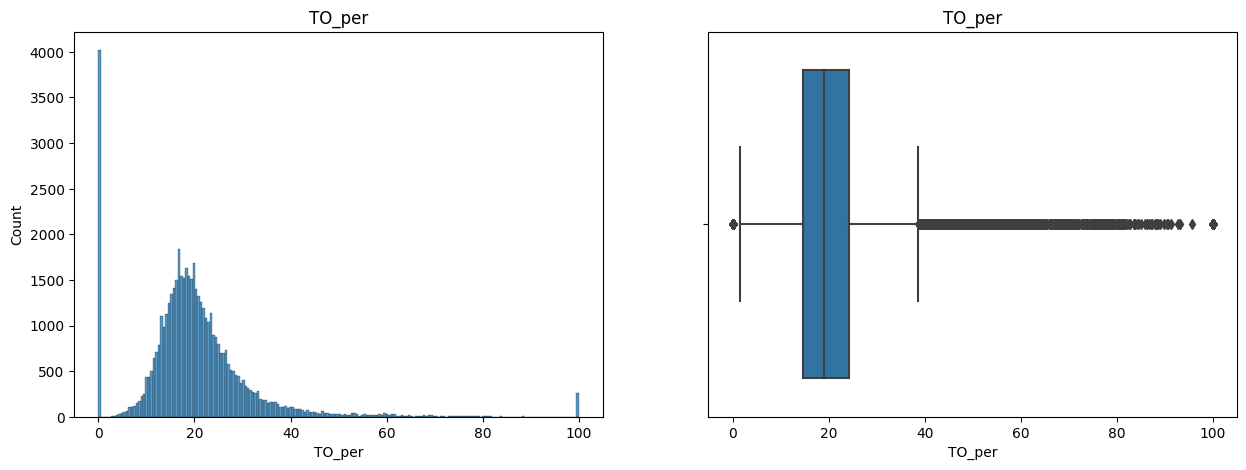

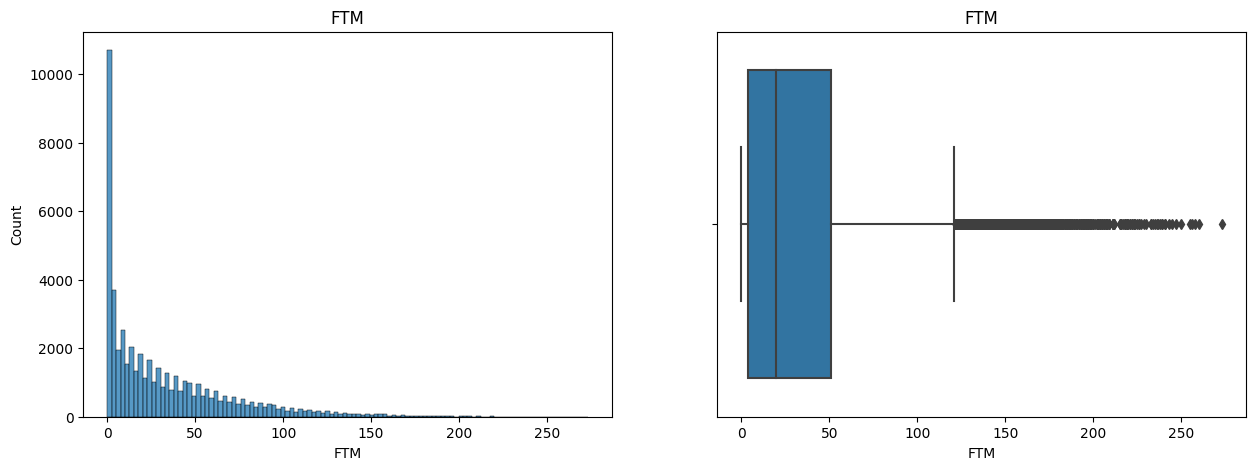

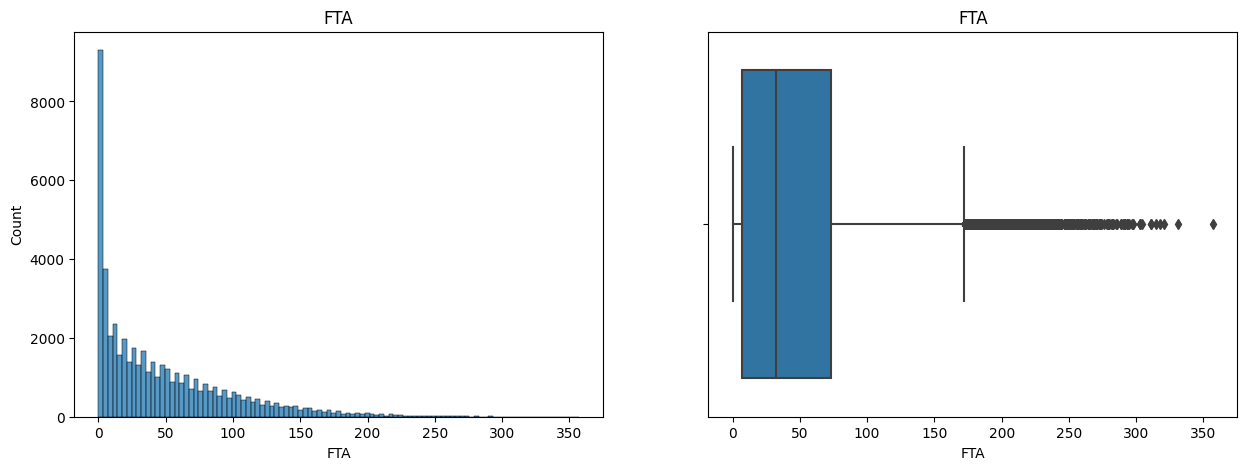

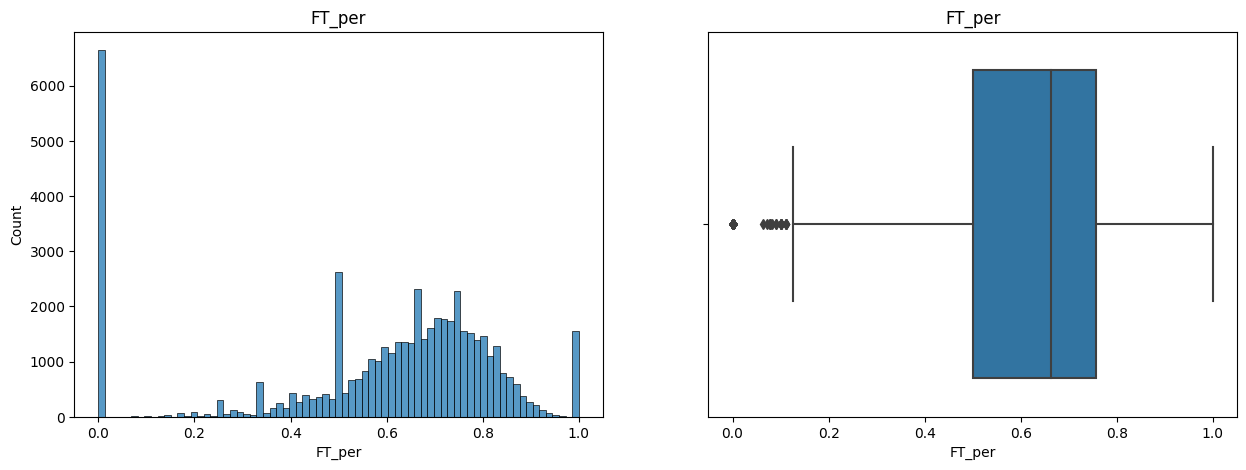

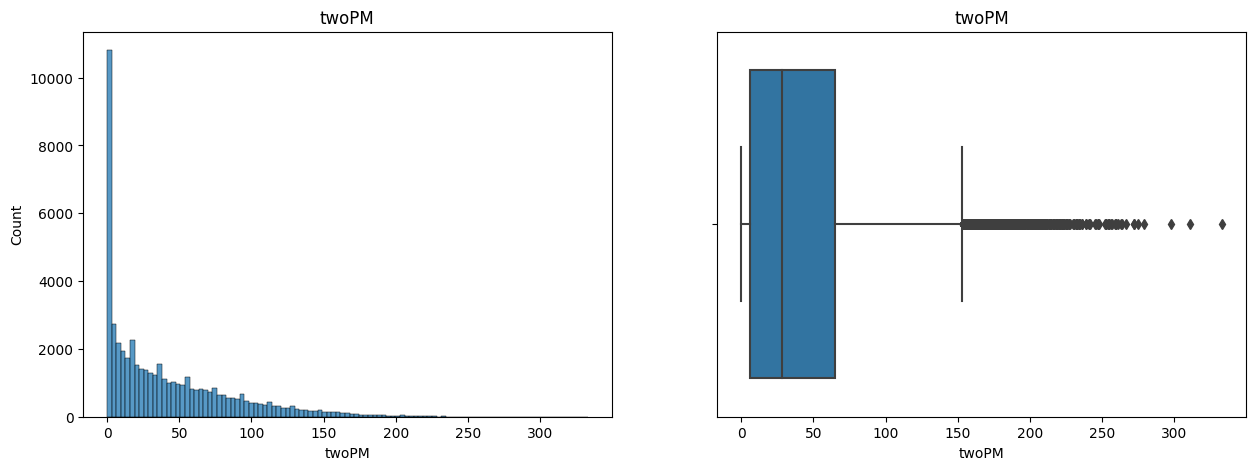

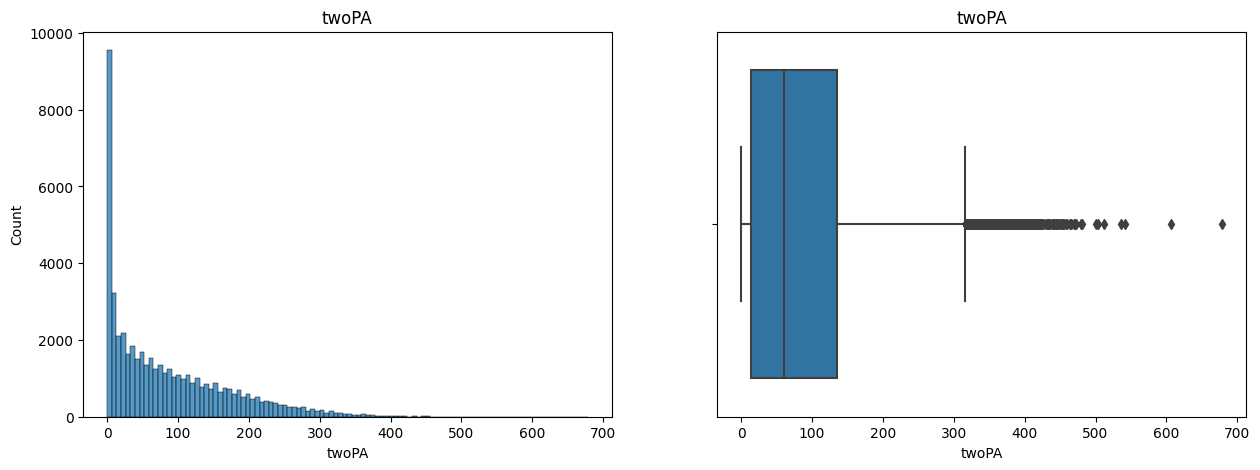

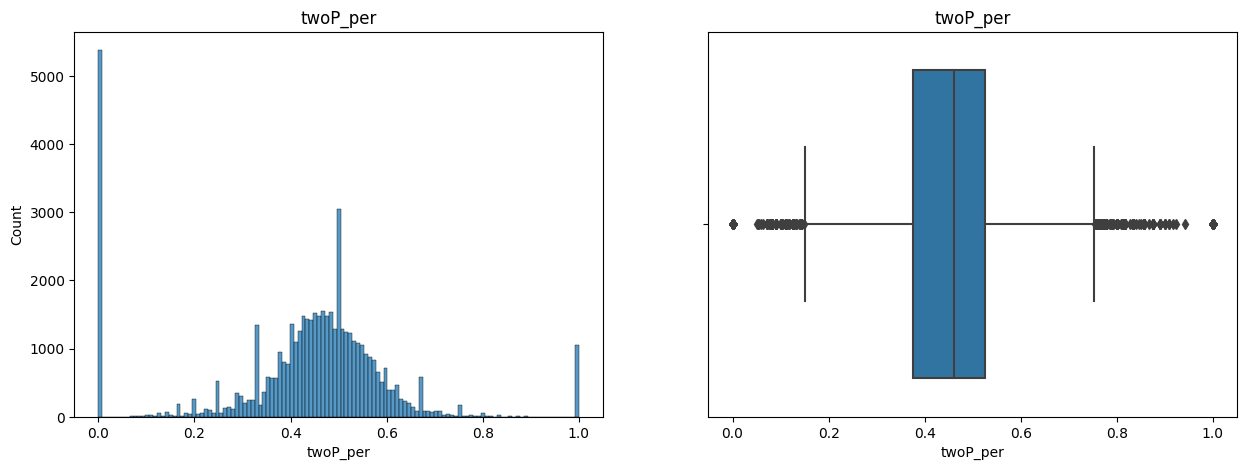

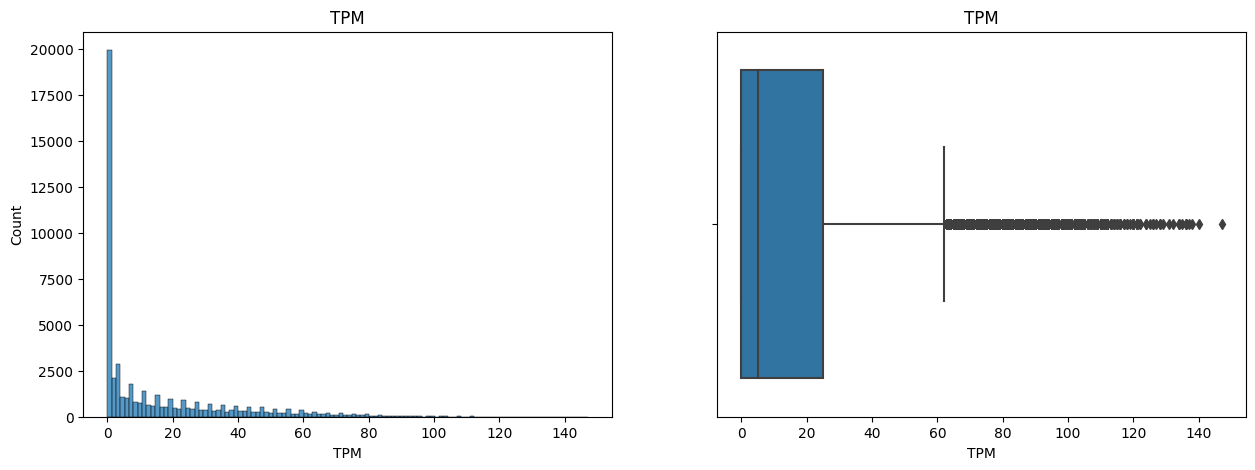

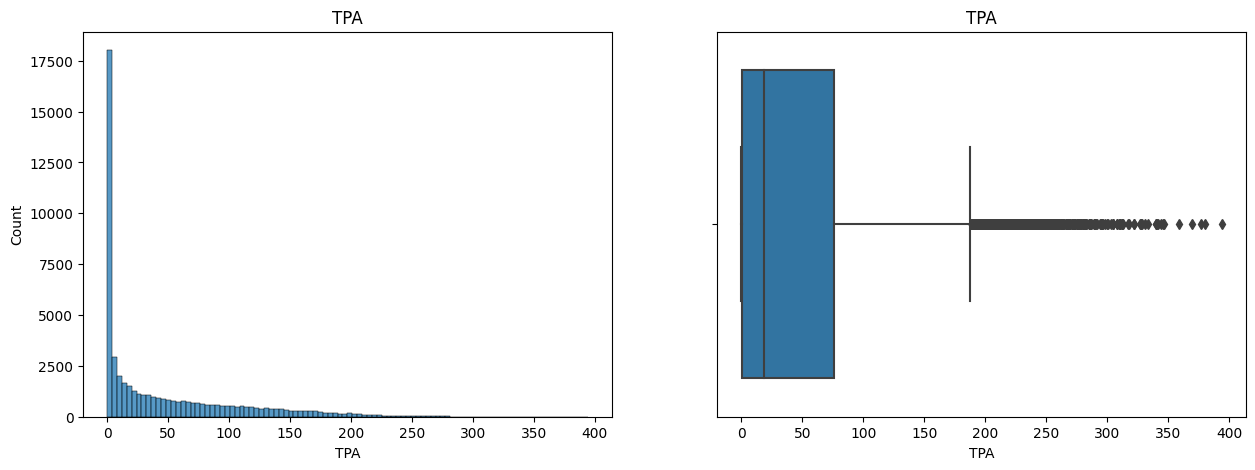

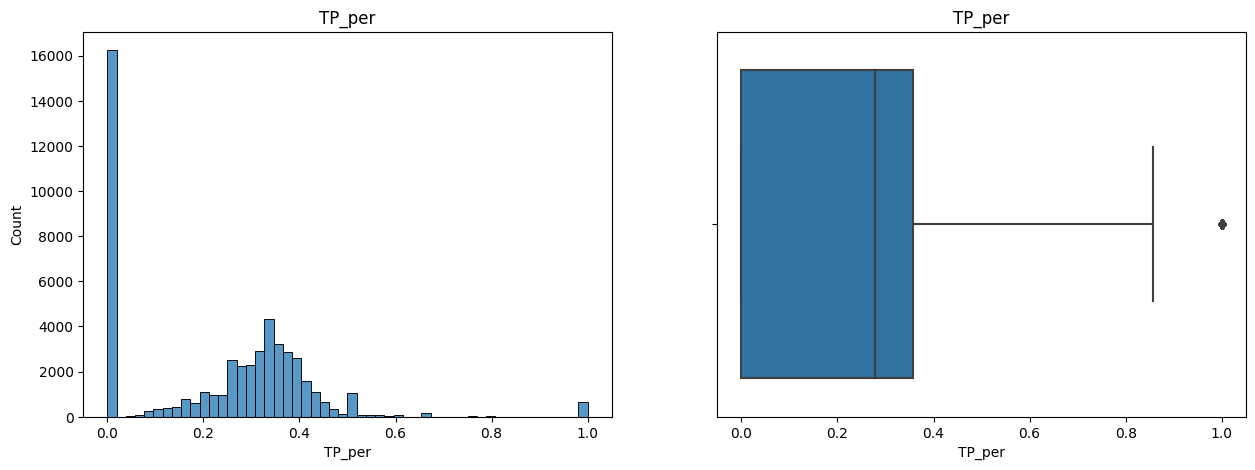

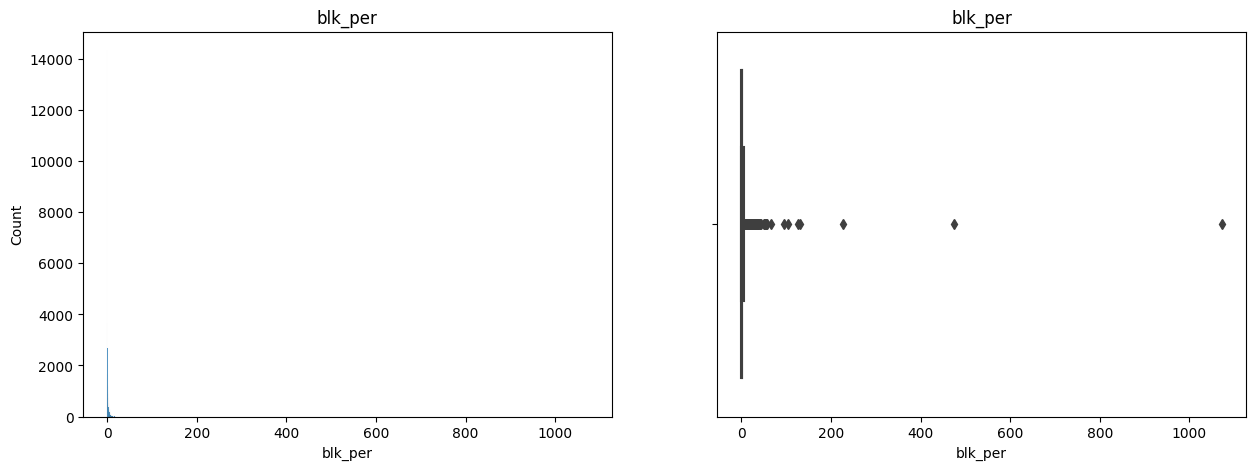

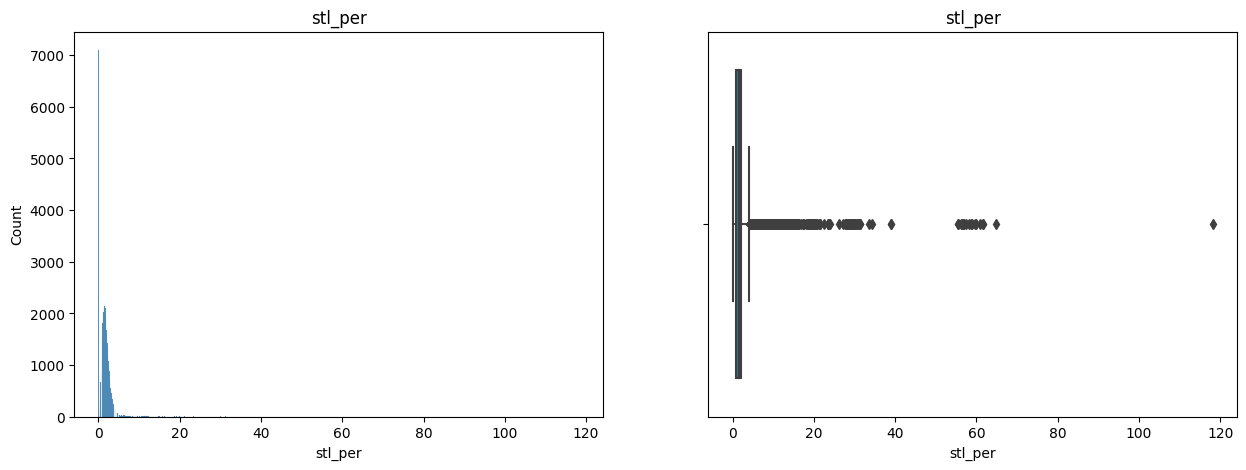

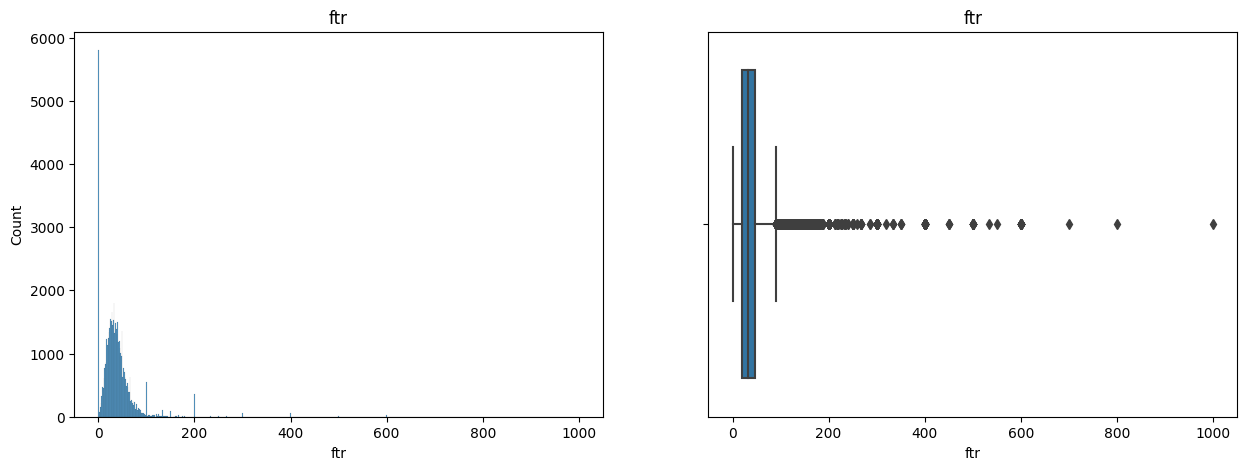

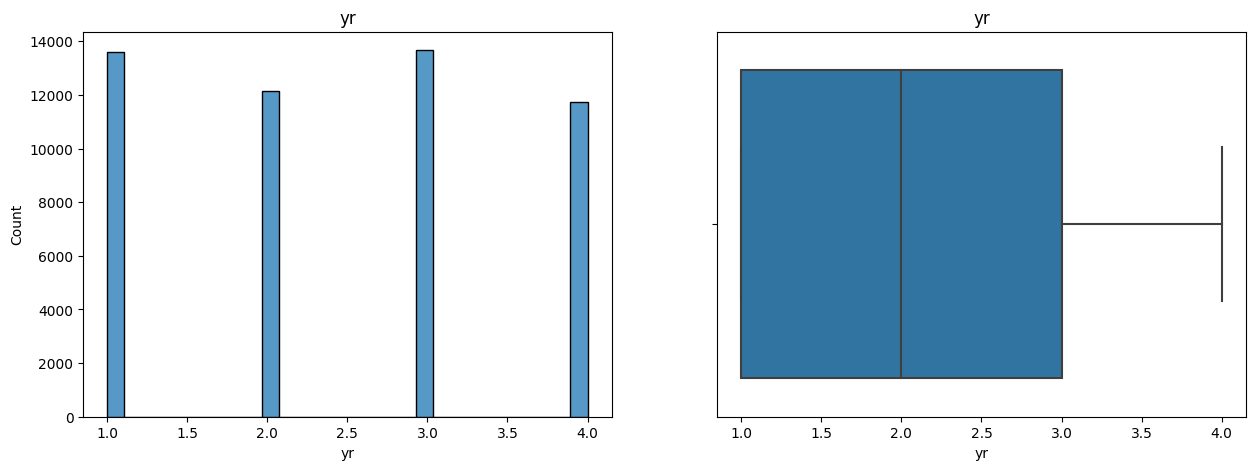

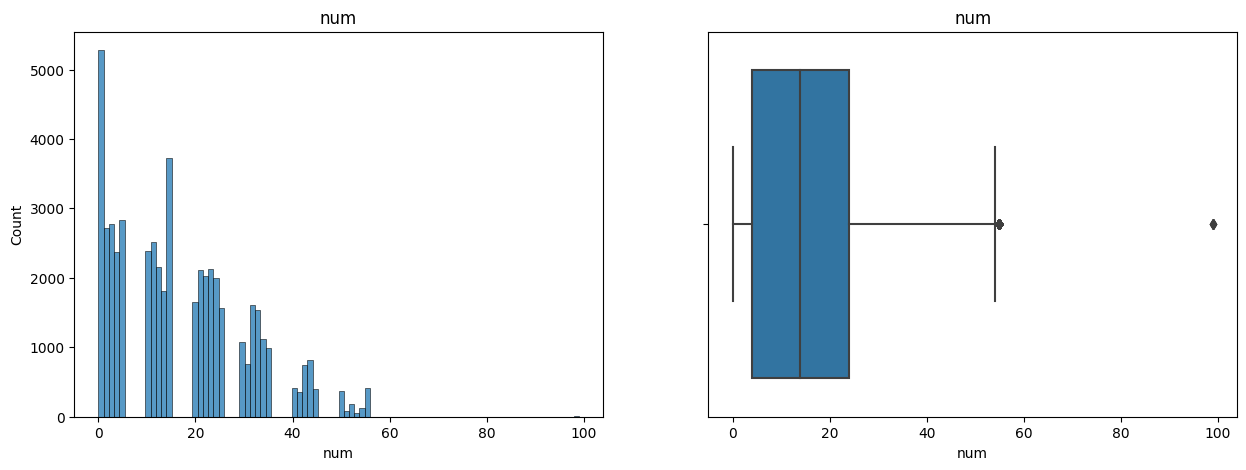

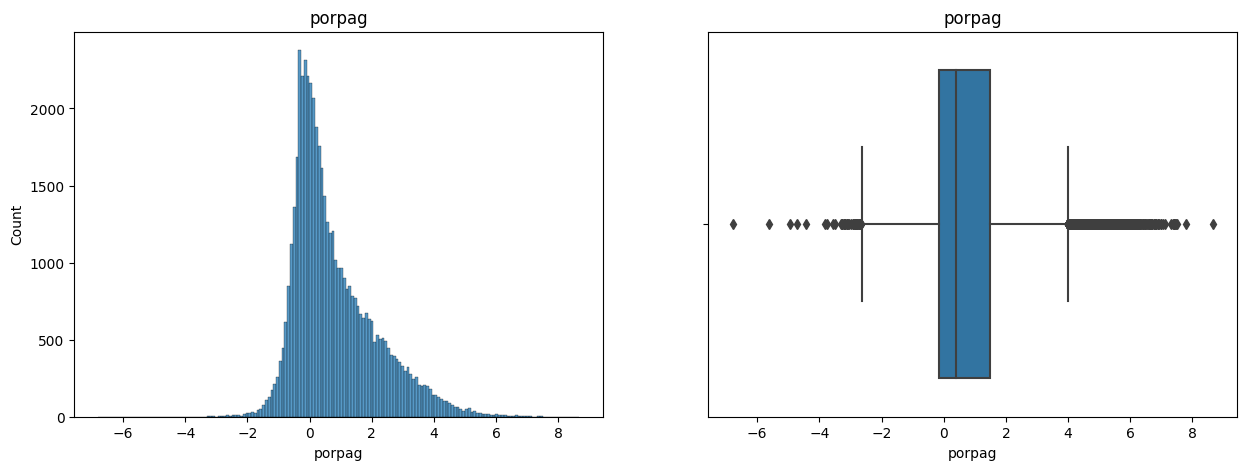

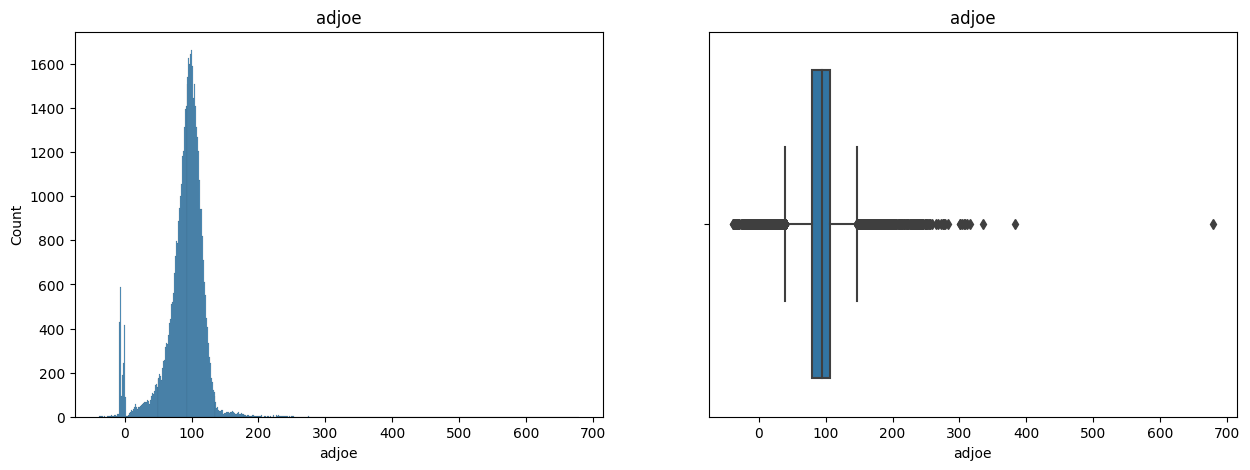

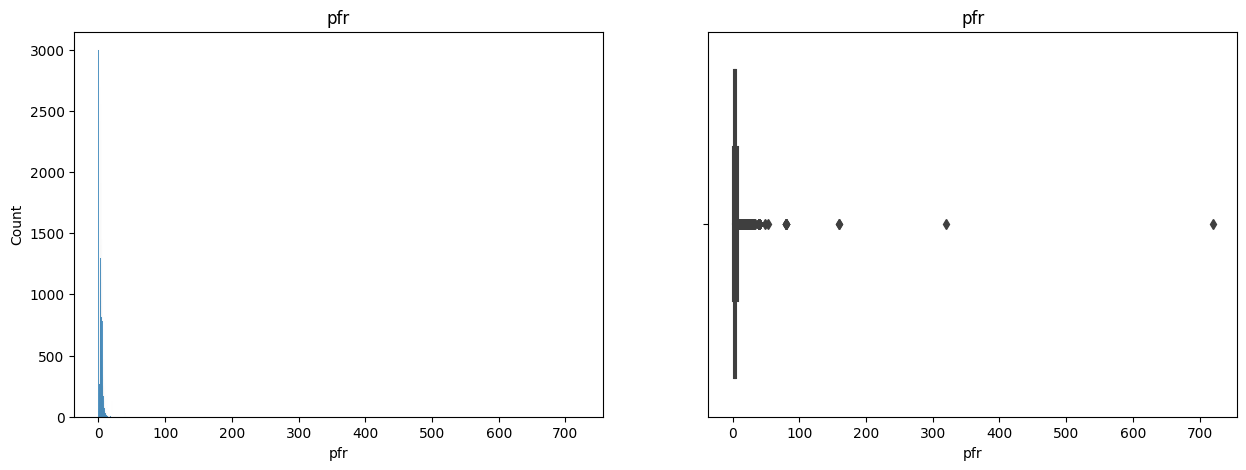

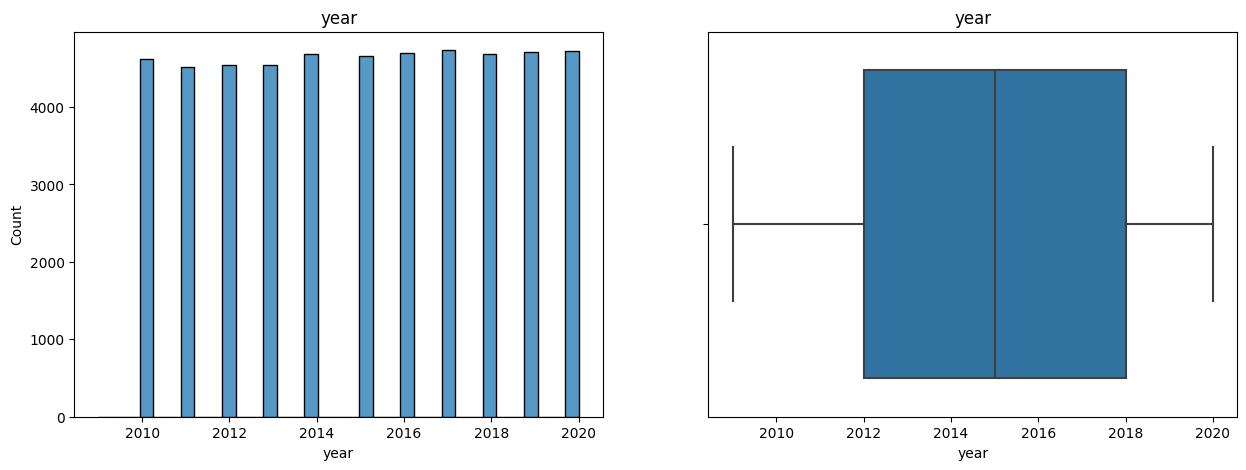

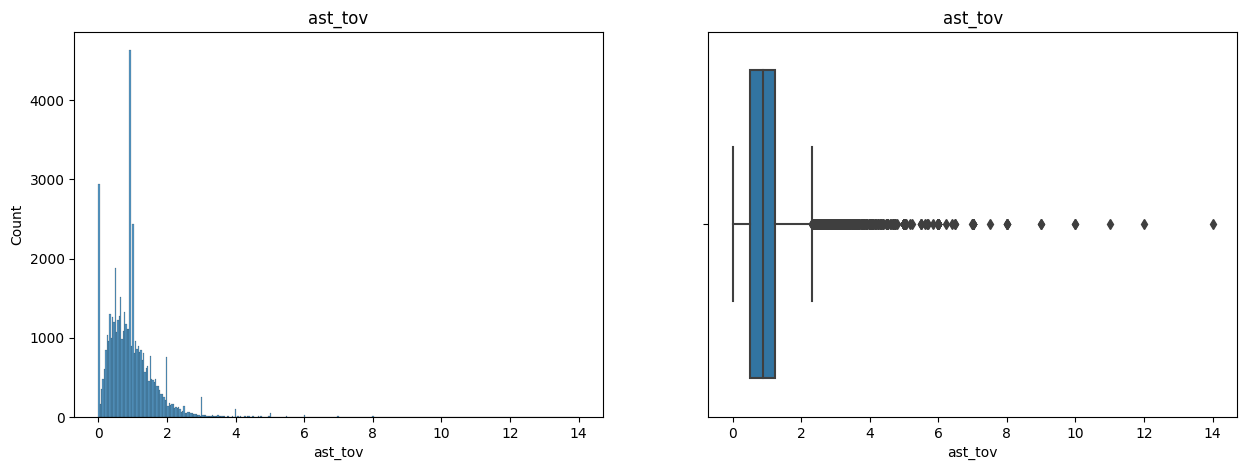

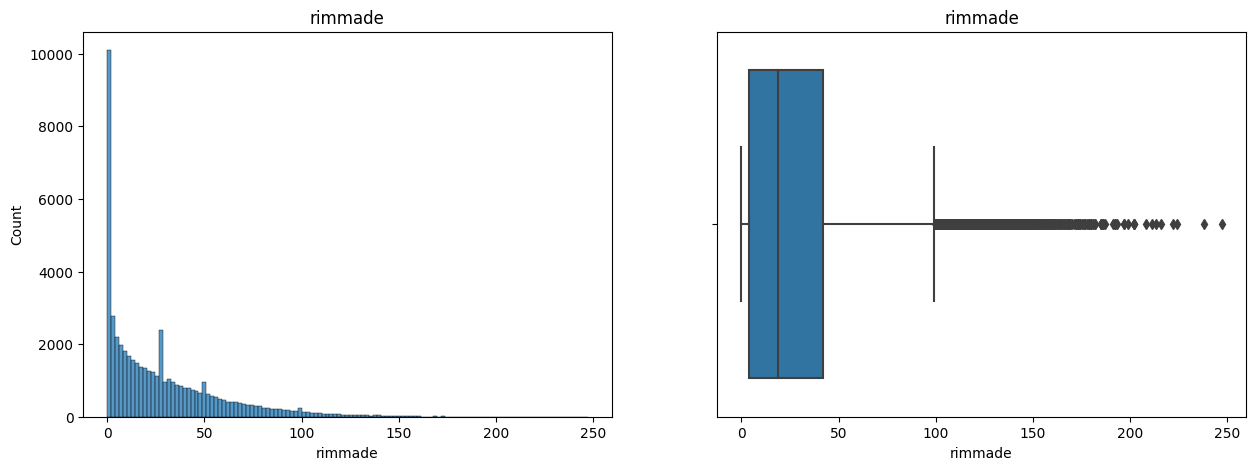

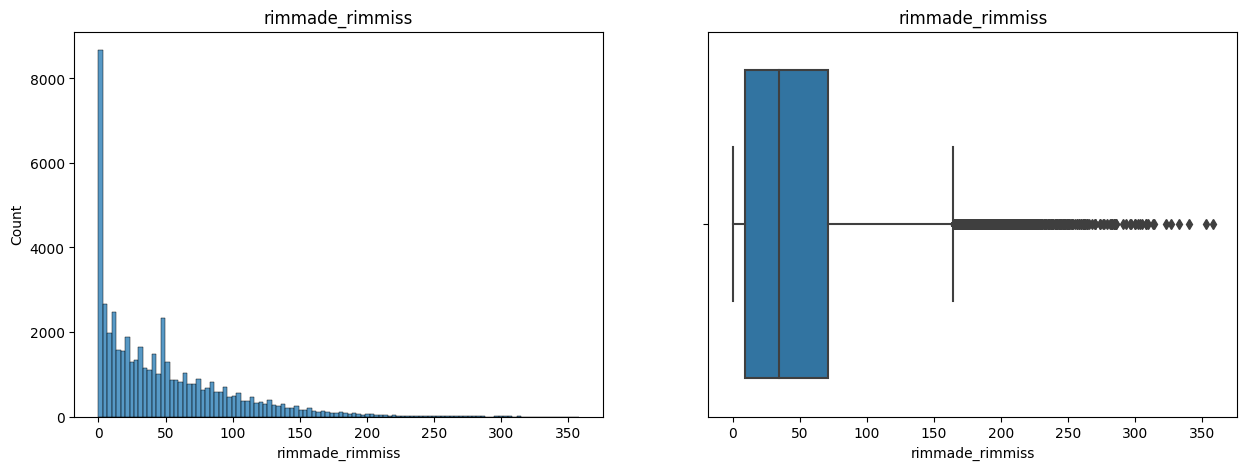

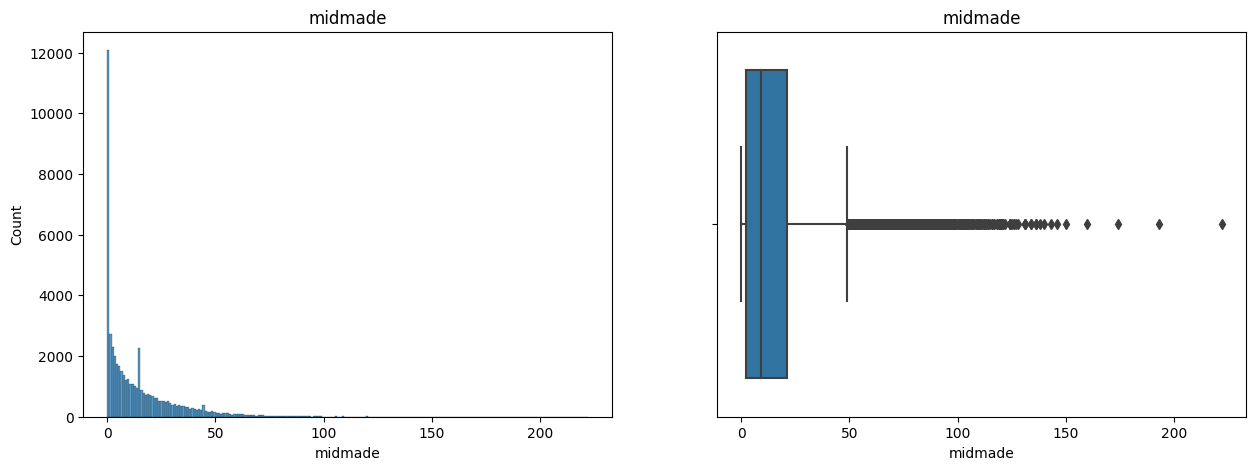

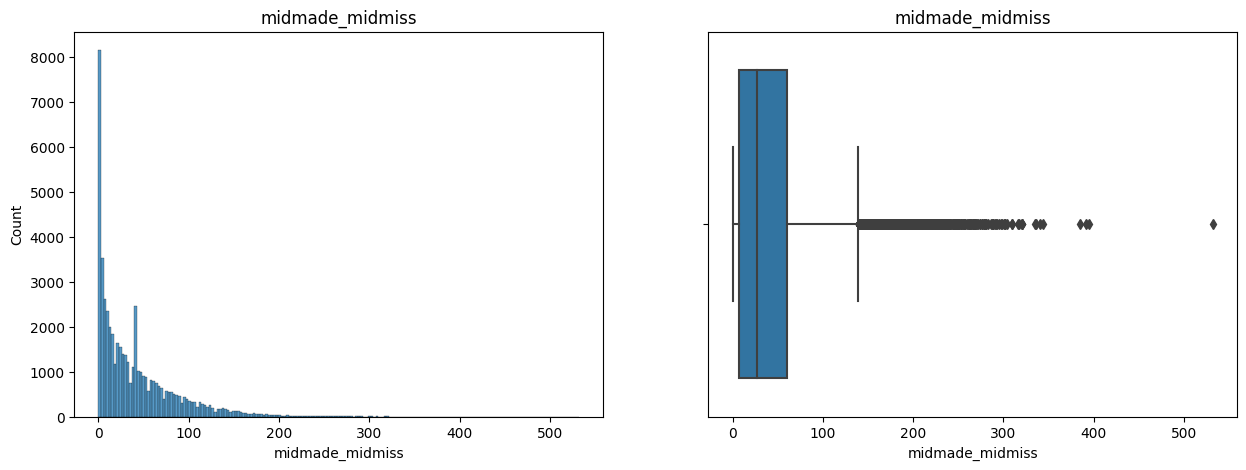

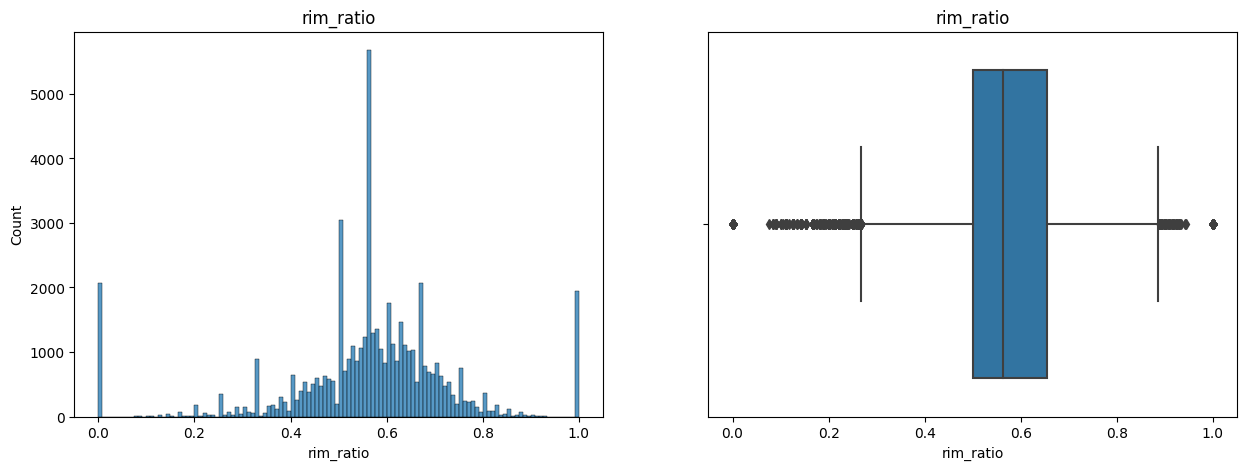

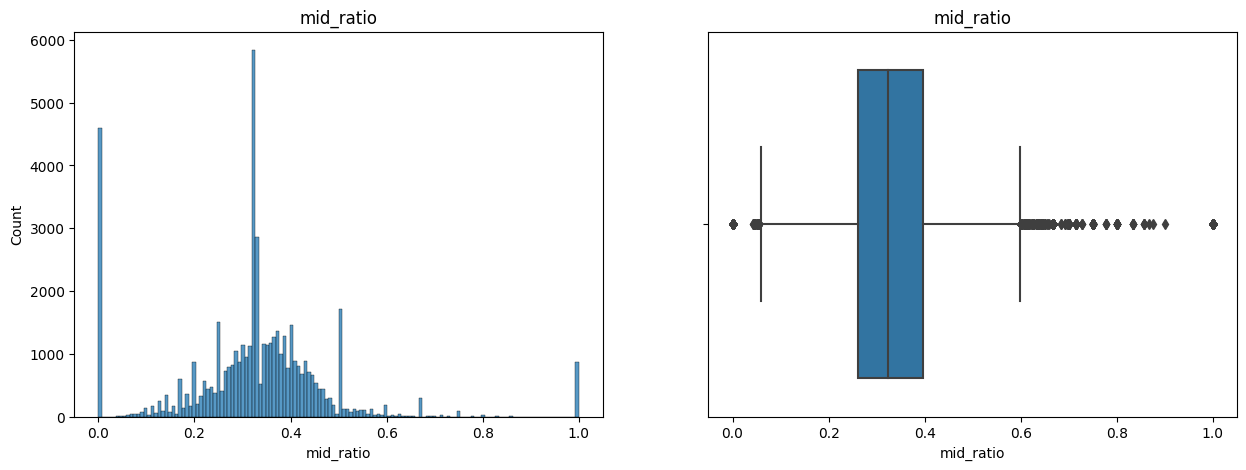

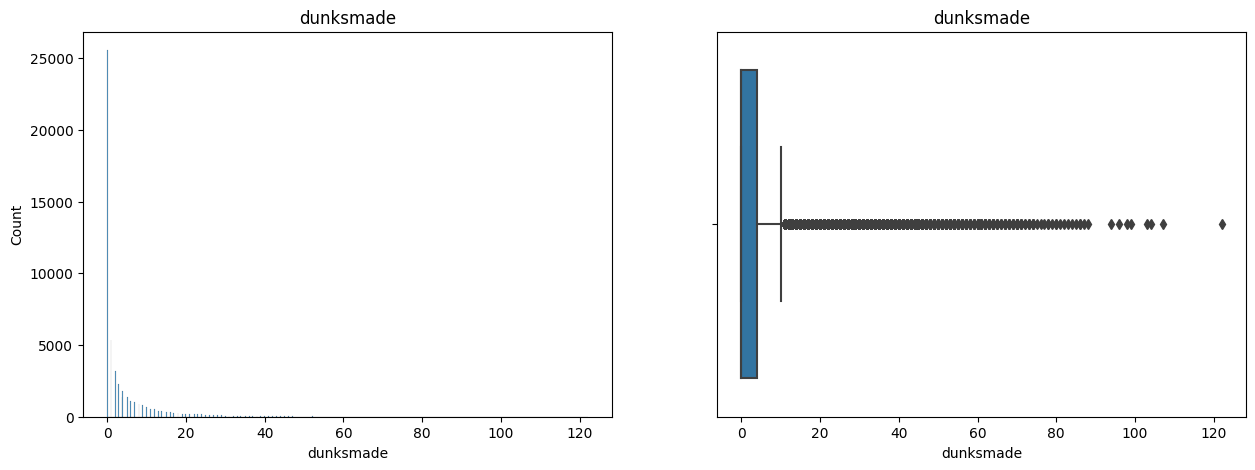

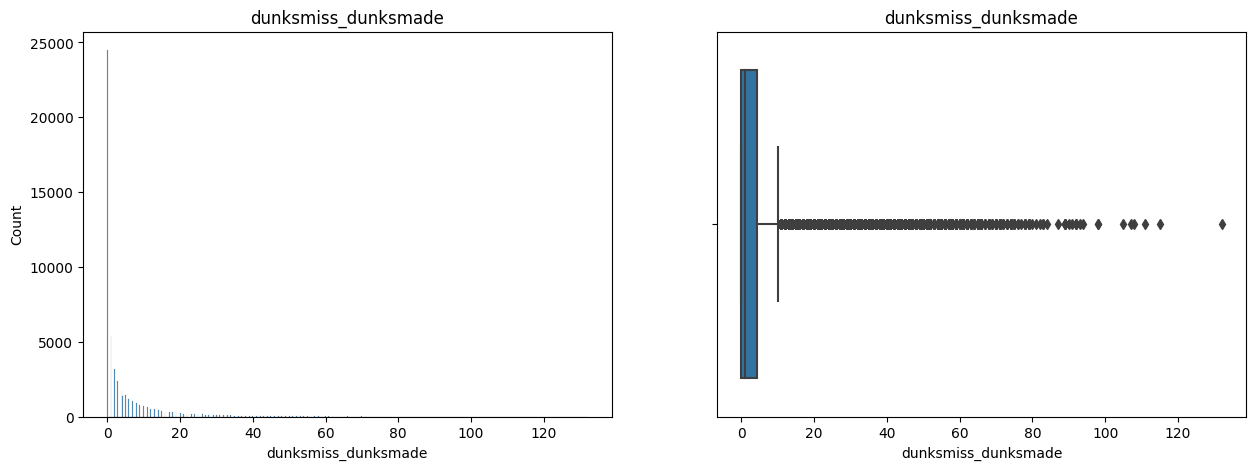

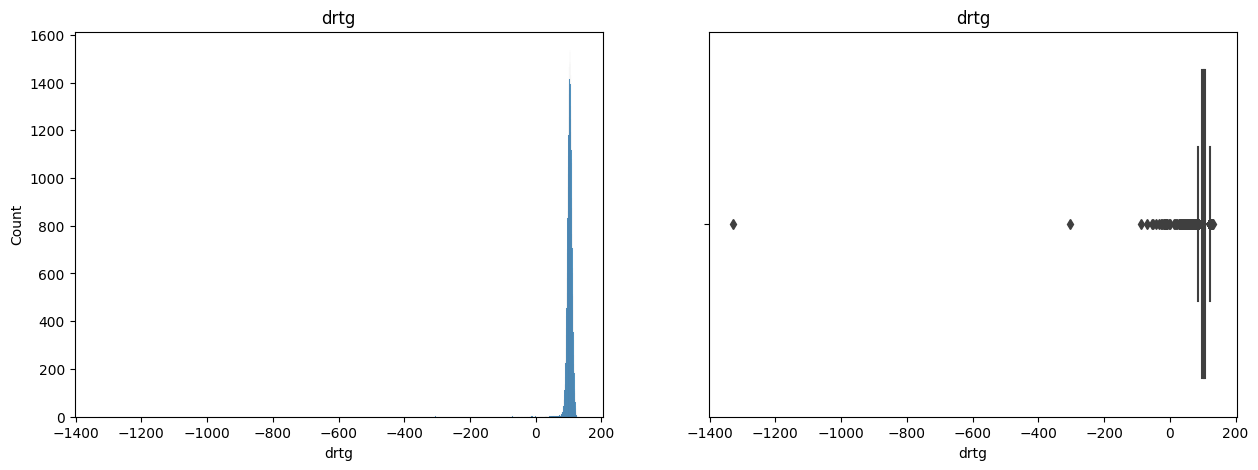

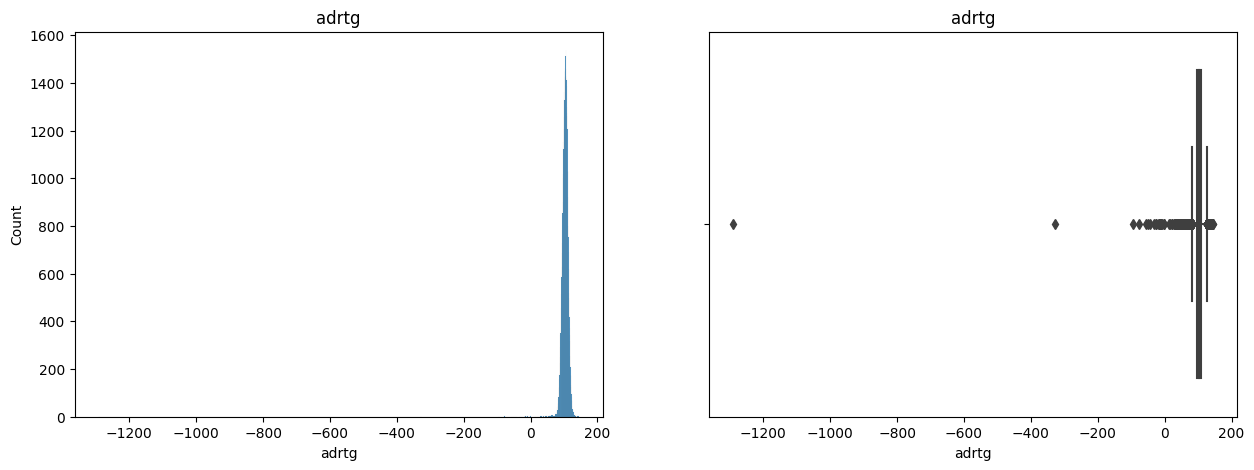

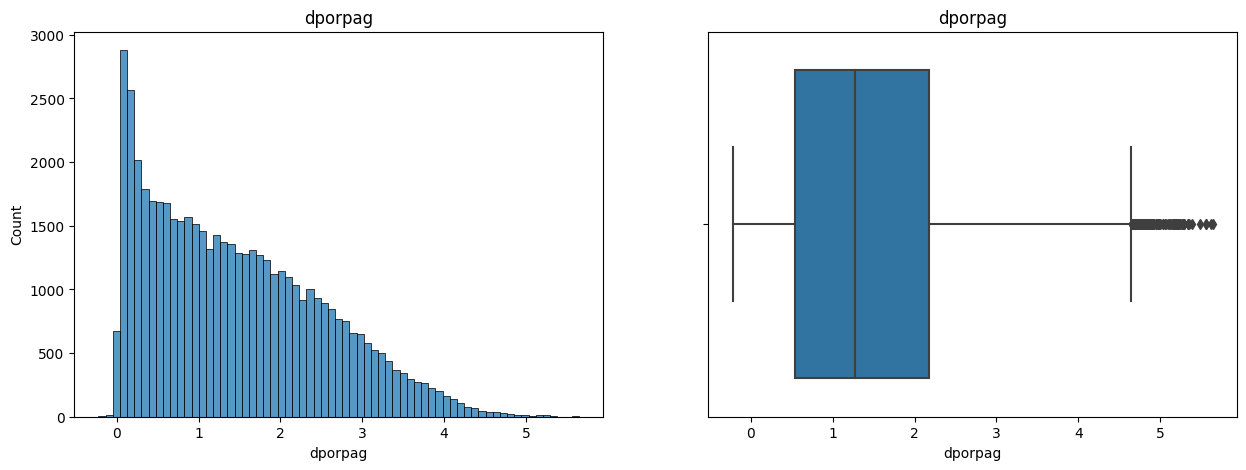

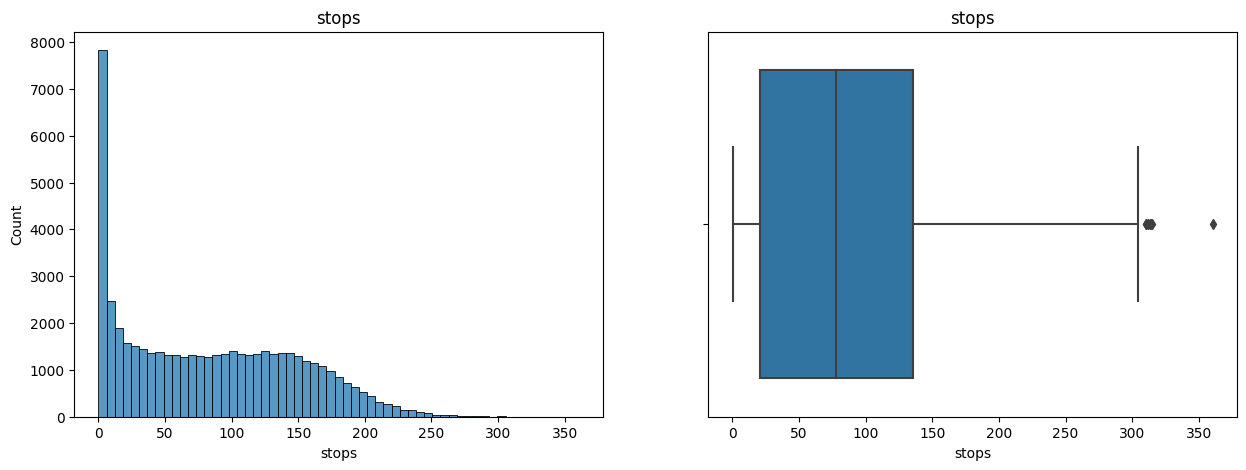

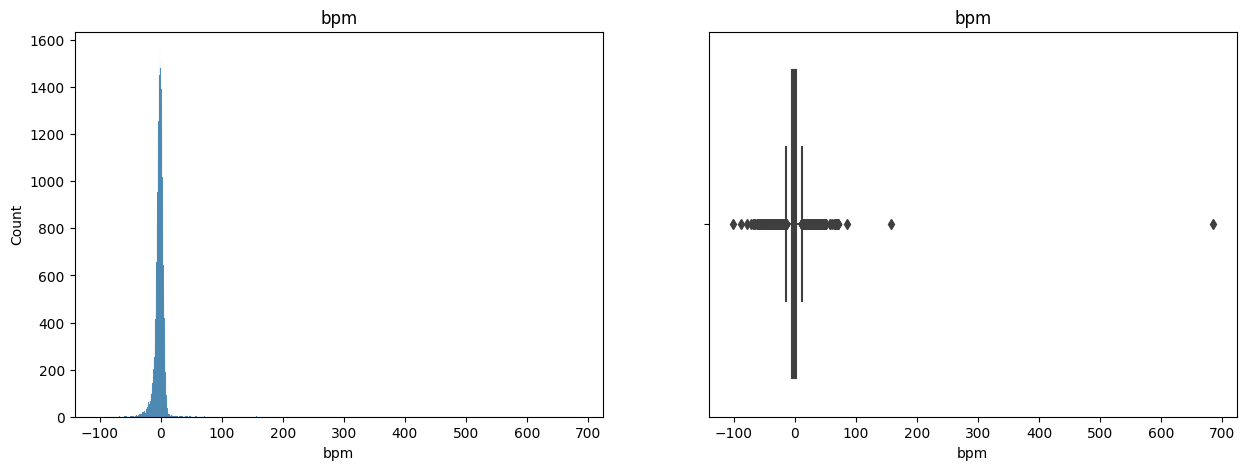

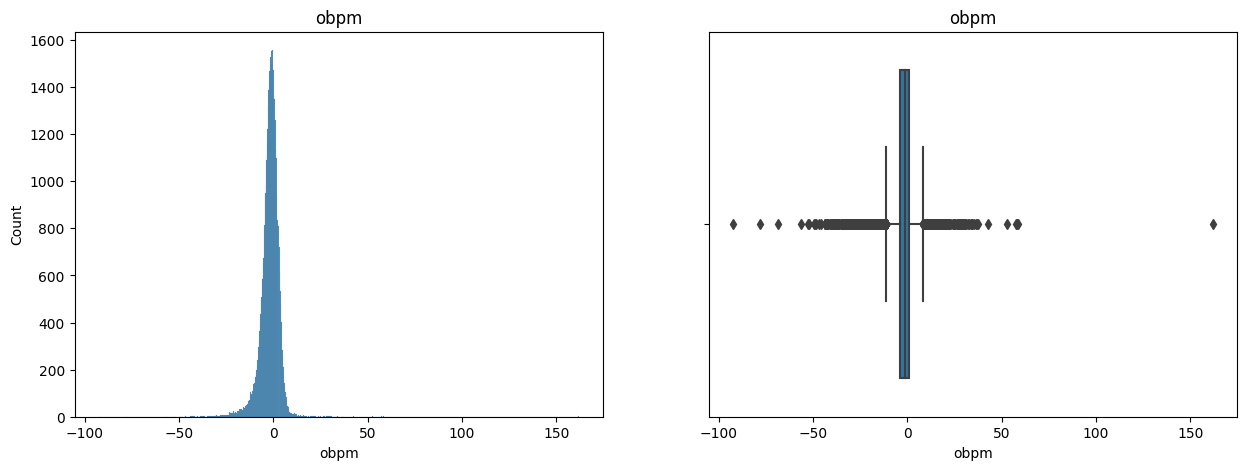

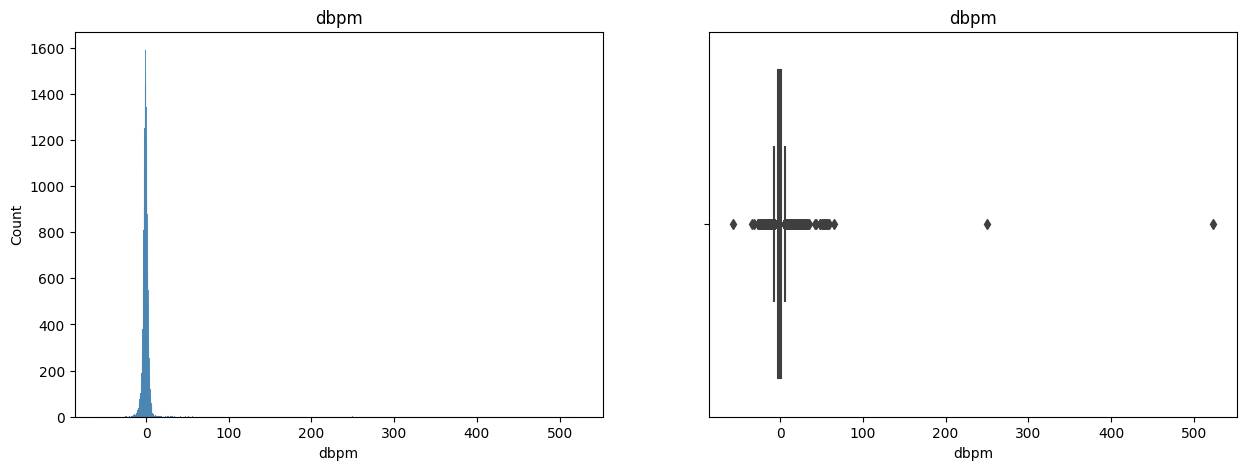

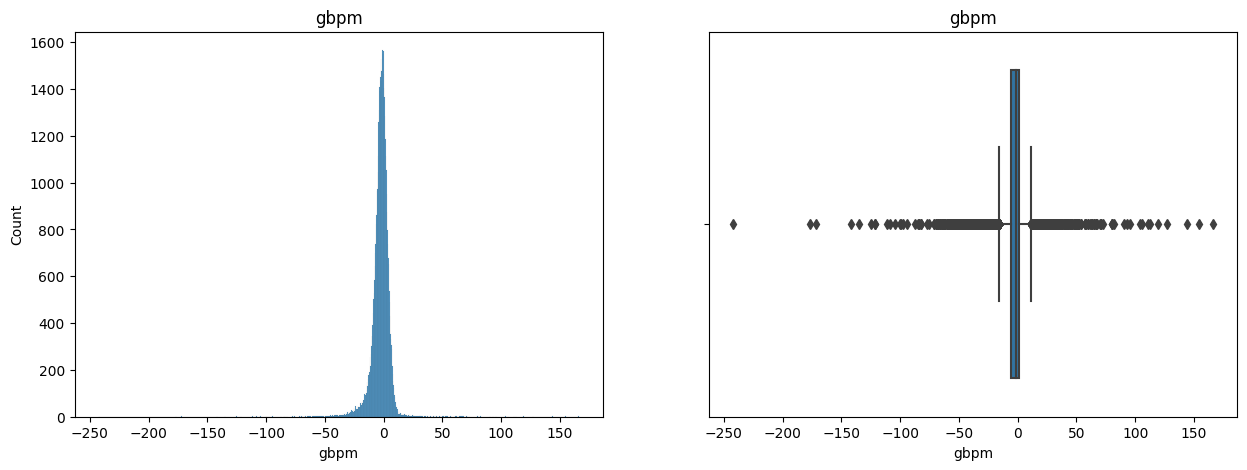

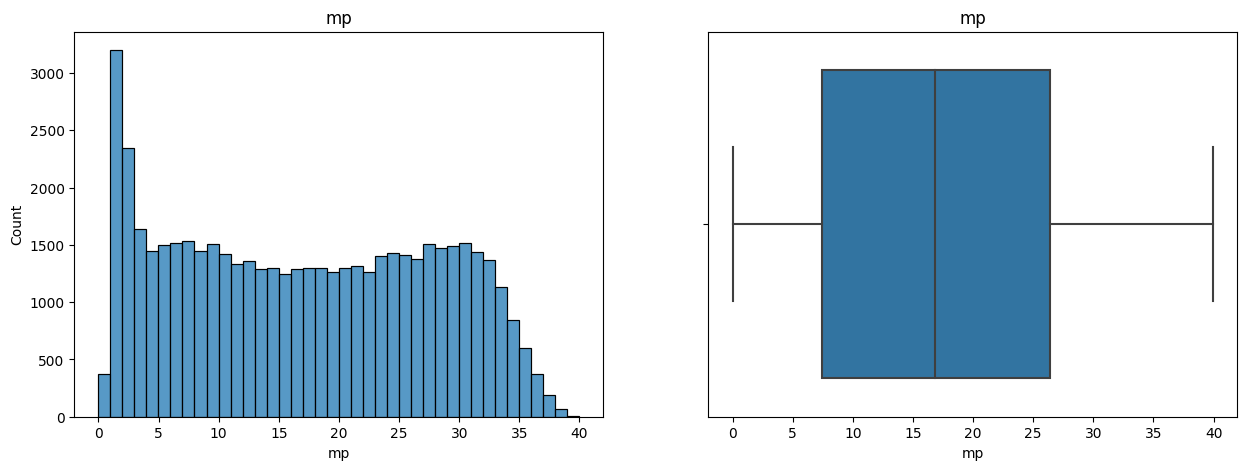

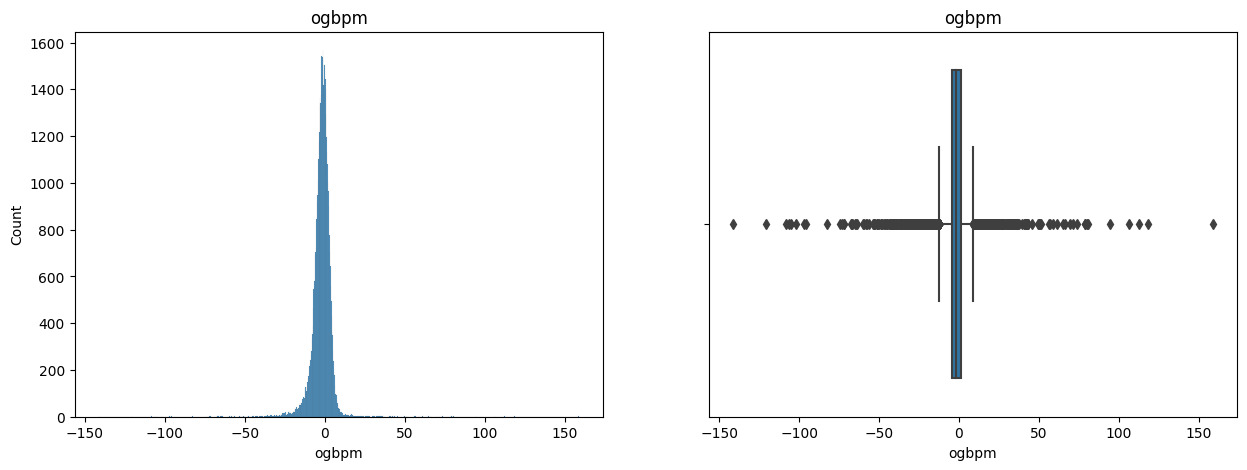

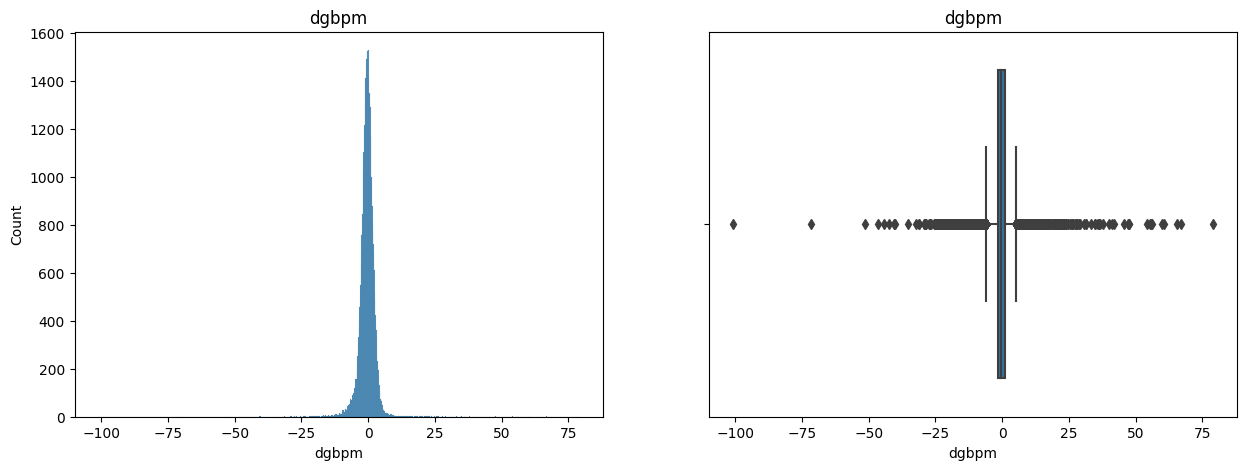

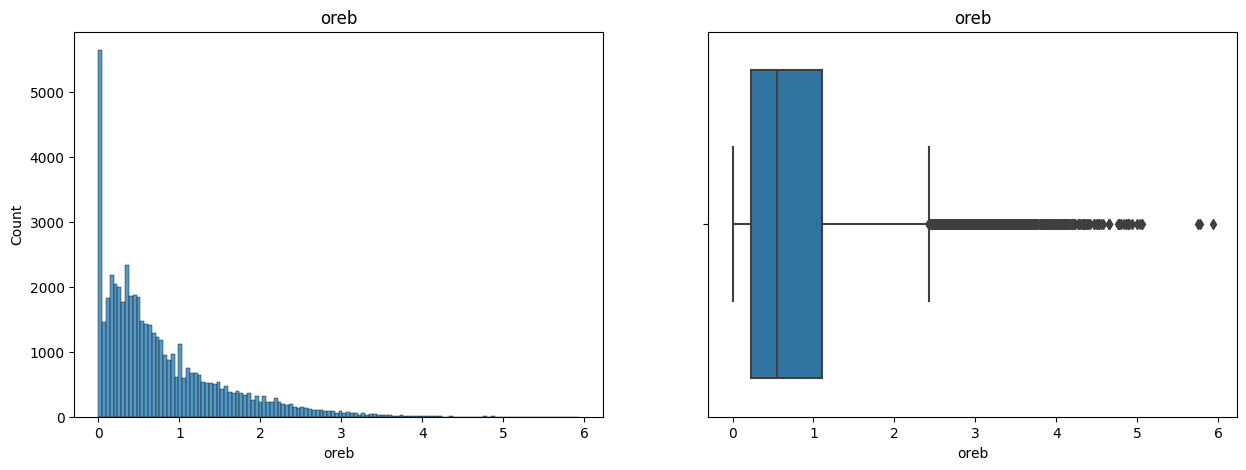

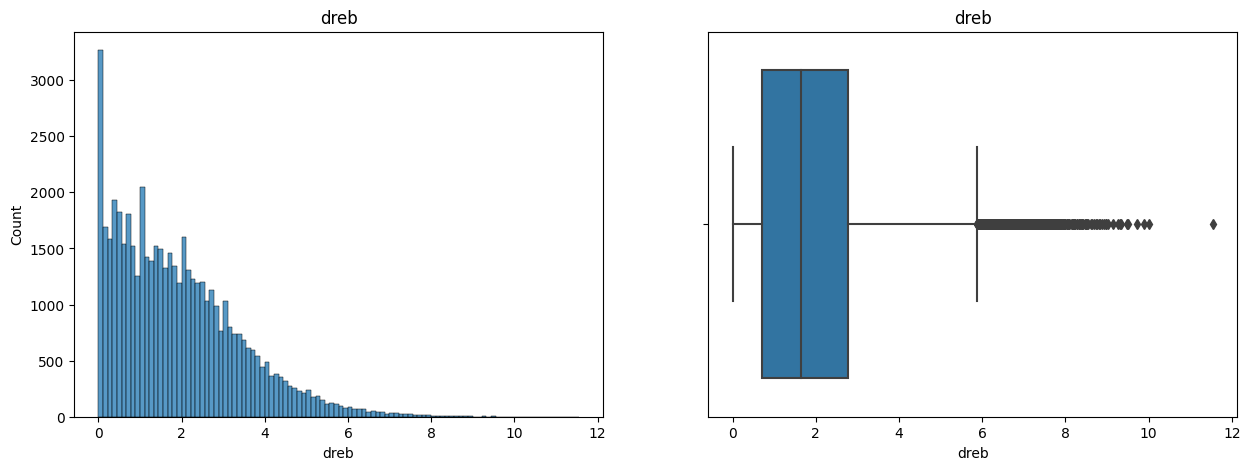

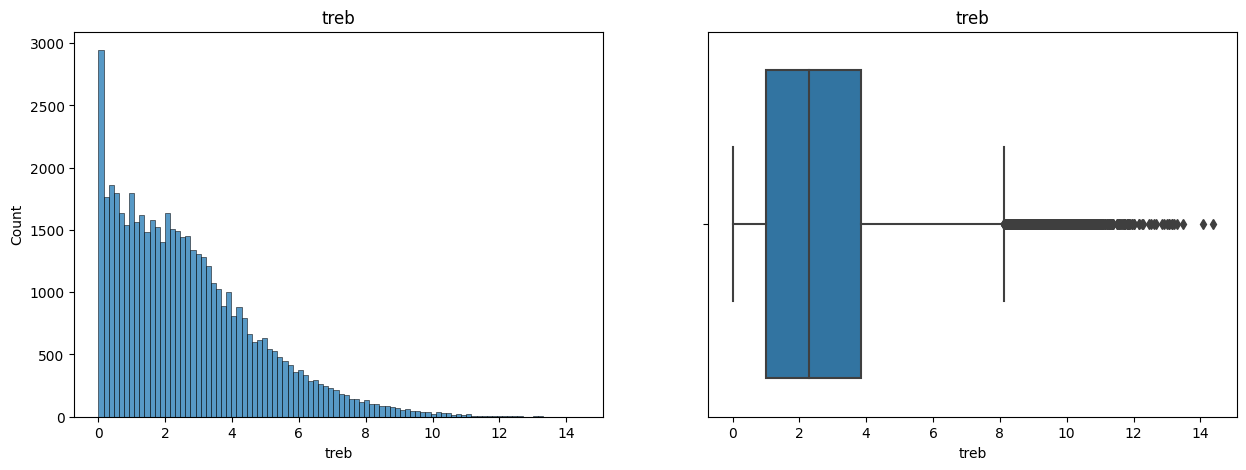

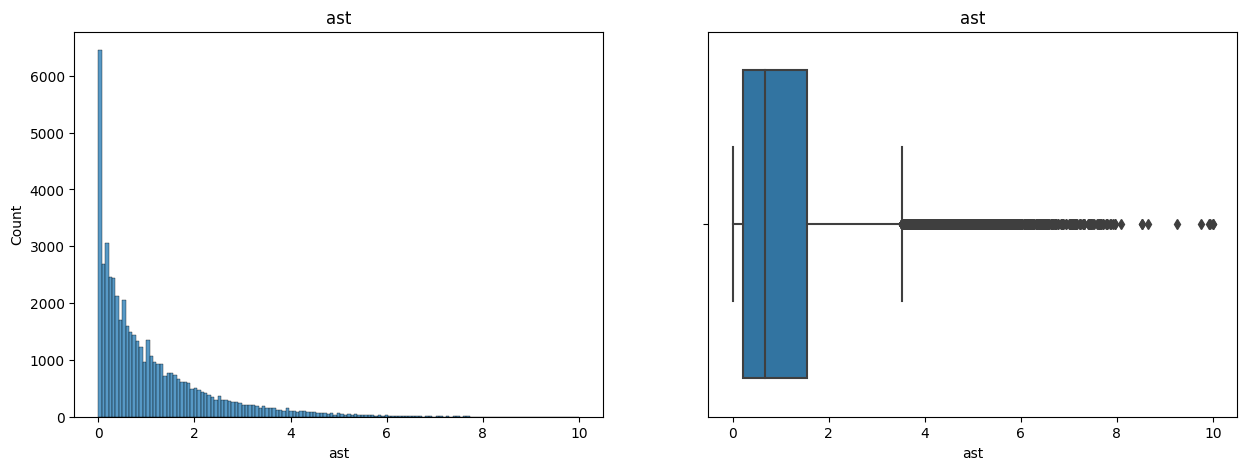

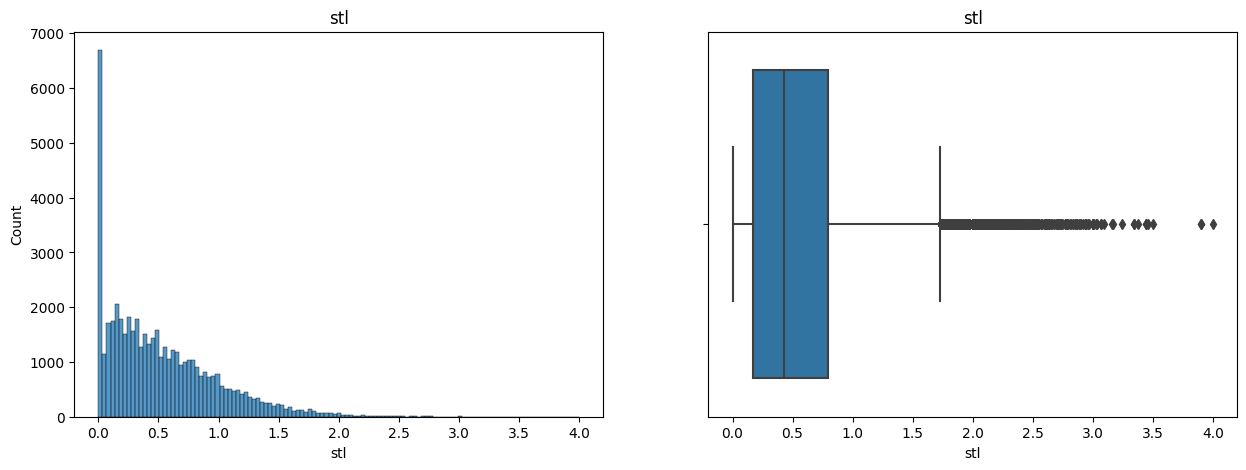

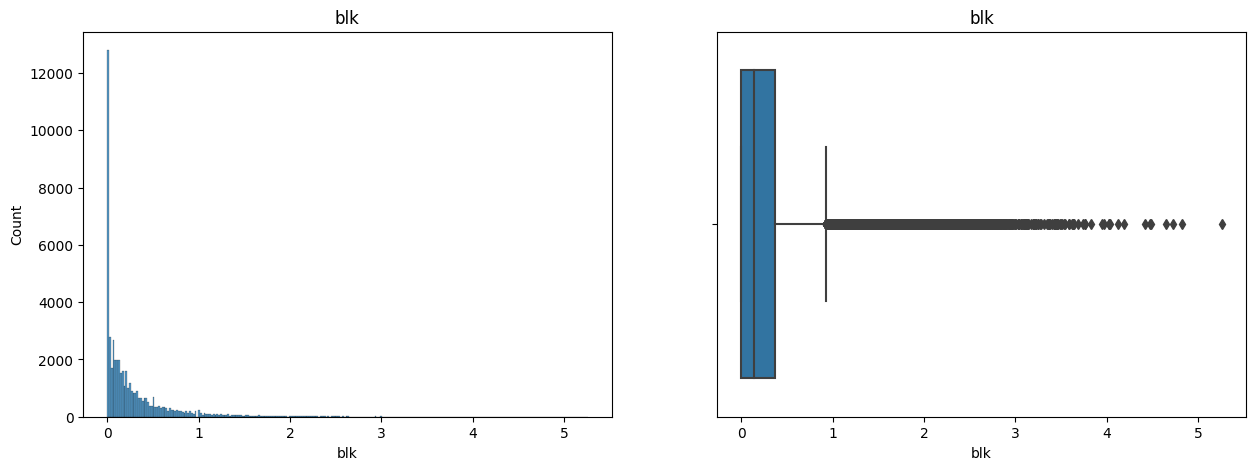

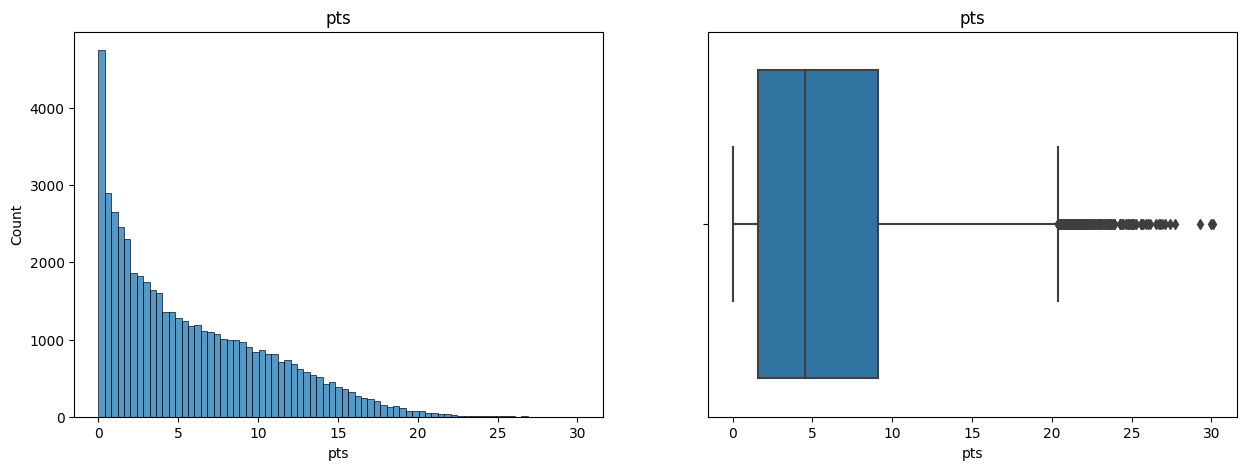

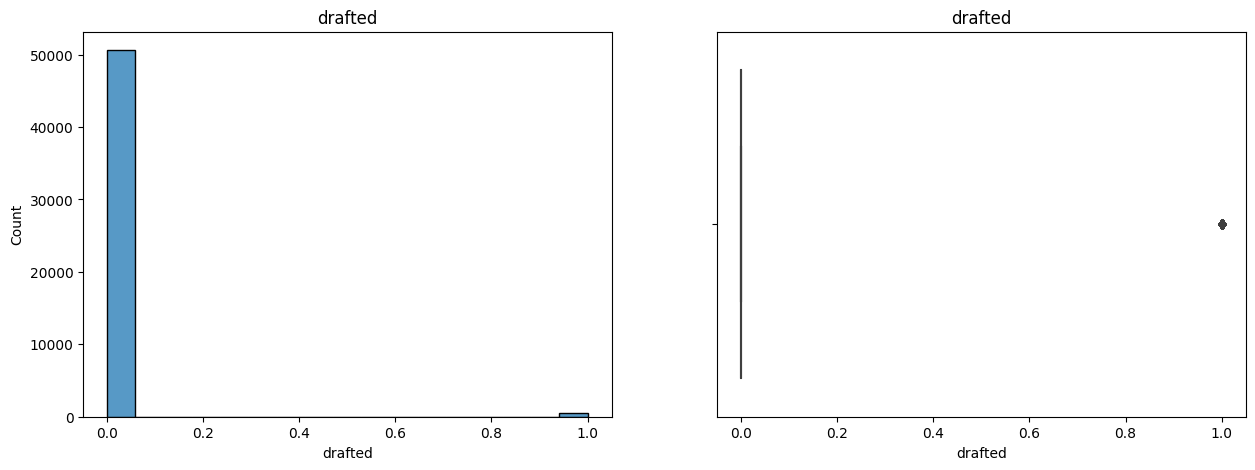

In [39]:
for column in num_cols_training.columns:
    fig, axes = plt.subplots(1, 2, figsize = (15, 5))
    sns.histplot(x = num_cols_training[column], ax = axes[0]).set(title = column)
    sns.boxplot(x  = num_cols_training[column], ax = axes[1]).set(title = column)
    fig.show()

There are many outliers in each column, hence data would need to be normalised in next stage

## 3. Data Split

In [40]:
X_train = num_cols_training.drop(['drafted'], axis=1)
y_train = num_cols_training['drafted']

In [41]:
# Unit Tests
assert y_train.shape == (51124, )
assert X_train.shape == (51124, 55)

In [42]:
y_train.value_counts(normalize=True)

drafted
0.0    0.990415
1.0    0.009585
Name: proportion, dtype: float64

In [43]:
X_test = num_cols_testing

In [44]:
# Unit Tests
assert X_test.shape == (4970, 55)

Those CSVs may be used in further experiments.

## 4. Data Scaling

In [46]:
std_scaler = StandardScaler()
min_scaler = MinMaxScaler()

In [47]:
min_scaler.fit(X_train)
std_scaler.fit(X_train)

StandardScaler()

In [48]:
X_train_std_scaled = std_scaler.transform(X_train)
X_test_std_scaled = std_scaler.transform(X_test)

In [49]:
X_train_min_scaled = min_scaler.transform(X_train)
X_test_min_scaled = min_scaler.transform(X_test)

## 5. Assess Baseline Model

In [50]:
y_mode = y_train.mode()

In [51]:
y_base = np.full(y_train.shape, y_mode)

In [52]:
# Unit Tests
assert isinstance(y_base, np.ndarray)
assert y_base.shape == y_train.shape

In [53]:
auc_score = roc_auc_score(y_train, y_base)
print("AUROC Score:", auc_score)

AUROC Score: 0.5


Baseline model shows a poor level of AUROC score. 

## 6. Train a Logistic Regression Model and Predicting AUROC Score on Training Dataset

In [54]:
log_reg = LogisticRegression()
log_reg_regul = LogisticRegression(penalty='elasticnet', l1_ratio=1, solver='saga')


In [55]:
log_reg.fit(X_train_std_scaled, y_train)
log_reg_regul.fit(X_train_std_scaled, y_train)

LogisticRegression(l1_ratio=1, penalty='elasticnet', solver='saga')

In [56]:
train_pred_prob1 = log_reg.predict_proba(X_train_std_scaled)
train_pred_prob2 = log_reg_regul.predict_proba(X_train_std_scaled)
print(train_pred_prob1.shape)
print(train_pred_prob2.shape)


(51124, 2)
(51124, 2)


In [57]:
auroc_score1 = roc_auc_score(y_train, train_pred_prob1[:,1])
auroc_score2 = roc_auc_score(y_train, train_pred_prob2[:,1])
print(auroc_score1)
print(auroc_score2)

0.9893805324001861
0.9829793322708869


In [58]:
fpr1, tpr1, thresh1 = roc_curve(y_train, train_pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_train, train_pred_prob2[:,1], pos_label=1)


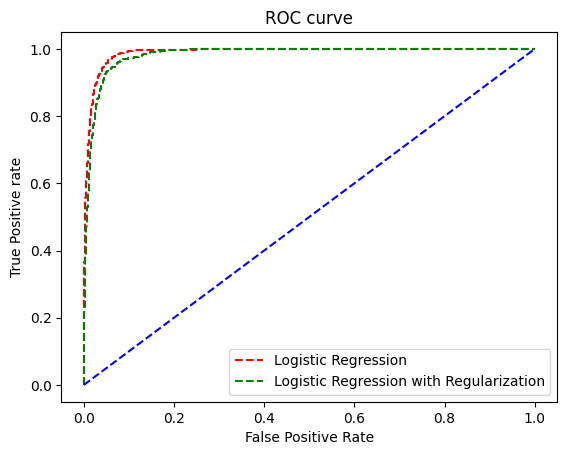

In [59]:
random_probs = [0 for i in range(len(y_train))]
p_fpr, p_tpr, _ = roc_curve(y_train, random_probs, pos_label=1)
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression with Regularization')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

Default logistic regression has a higher AUROC score than logistic regression with regaularization.

## 7. Predicting the probabilities on Testing Dataset

In [60]:
test_std_scaled = log_reg.predict_proba(X_test_std_scaled)
#print(test_std_scaled.shape)
#print(cat_cols_testing.shape)


In [61]:
playerid = cat_cols_testing['player_id']
player_id = pd.DataFrame({'player_id': playerid})
player_id = player_id.reset_index(drop=True)
draft = test_std_scaled[:, 1]
drafted = pd.DataFrame({'drafted': draft})

prediction_model1 = pd.concat([player_id, drafted], axis=1)
prediction_model1


,player_id,drafted
0,cf302b4d-84f7-4124-a25d-a75eed31978b,7.822691e-09
1,f91837cd-4f49-4b70-963d-aeb82c6ce3da,1.020826e-07
2,53ec2a29-1e7d-4c6d-86d7-d60d02af8916,3.657402e-05
3,32402798-471c-4a54-8cb4-29cd95199014,1.435832e-06
4,73b960f9-27b8-4431-9d23-a760e9bbc360,3.064841e-03
...,...,...
4965,a25ee55f-02a3-4f8e-8194-a5f427e14e7c,3.105698e-11
4966,d0d9f45e-7b01-44b3-8d40-514ec338611d,3.121937e-06
4967,f8df22c4-1602-4fab-896d-8820951aae2f,6.113444e-07
4968,b791c69a-f769-4163-afda-051a6fd20a9d,1.534900e-06


In [62]:
prediction_model1.to_csv('../data/prediction_model1.csv', index=False)

Probability predictons will be submitted to Kaggle competition to obtain AUROC scores for testing dataset

# This model obtained 0.98243 AUROC score from Kaggle

In [65]:
joblib.dump(log_reg, '../models/Log_reg.joblib')
joblib.dump(X_test_std_scaled, '../models/X_test.joblib')

['../models/X_test.joblib']